# Introduction

In [1]:
#You can find data below:
#https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009
#You can find video below:
#https://youtu.be/R59kejfwWZc

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
import math
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

In [3]:
#https://medium.com/projectpro/20-machine-learning-projects-that-will-get-you-hired-in-2021-a89473f2d2c7
#Like mentioned above. This dataset is such a great dataset for beginners.
#We can use this dataset for both regression and classification models. Also I will try to convert in into a clustering problem as well.

winedf=pd.read_csv("/content/drive/MyDrive/Python Files DataJarLabs/winequality-red.csv")
winedfo=winedf
#Orginal dataset has been saved as winedfo.

winedf

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Python Files DataJarLabs/winequality-red.csv'

In [ ]:
print(winedf.info())
print(winedf.isnull().sum()*100/winedf.shape[0])
winedf.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None
fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides

fixed acidity  volatile acidity  ...      alcohol      quality
count    1599.000000       1599.000000  ...  1599.000000  1599.000000
mean        8.319637          0.527821  ...    10.422983     5.636023
std         1.741096          0.179060  ...     1.065668     0.807569
min         4.600000          0.120000  ...     8.400000     3.000000
25%         7.100000          0.390000  ...     9.500000     5.000000
50%         7.900000          0.520000  ...    10.200000     6.000000
75%         9.200000          0.640000  ...    11.100000     6.000000
max        15.900000          1.580000  ...    14.900000     8.000000

[8 rows x 12 columns]

# Exploratory Data Analysis (EDA) & Visualization


In [ ]:
#Like we can observe, there is no Null in this dataset. If there was some Null values we could fill or drop them.
#Also data types of columns match our wishes.

In [ ]:
fig=px.histogram(winedf, x="quality", color="quality",color_discrete_sequence=px.colors.sequential.Plasma_r)
fig.show()


In [ ]:
winedf.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
from plotly.subplots import make_subplots

fig = make_subplots(rows=4, cols=3,subplot_titles=("fixed acidity", "volatile acidity", "citric acid", "residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol"))

fig.add_trace(go.Histogram(x=winedf["fixed acidity"],name="fixed acidity"),
              row=1, col=1)

fig.add_trace(go.Histogram(x=winedf["volatile acidity"],name="volatile acidity"),
              row=1, col=2)

fig.add_trace(go.Histogram(x=winedf["citric acid"],name="citric acid"),
              row=1, col=3)

fig.add_trace(go.Histogram(x=winedf["residual sugar"],name="residual sugar"),
              row=2, col=1)

fig.add_trace(go.Histogram(x=winedf["chlorides"],name="chlorides"),
              row=2, col=2)

fig.add_trace(go.Histogram(x=winedf["free sulfur dioxide"],name="free sulfur dioxide"),
              row=2, col=3)

fig.add_trace(go.Histogram(x=winedf["total sulfur dioxide"],name="total sulfur dioxide"),
              row=3, col=1)

fig.add_trace(go.Histogram(x=winedf["density"],name="density"),
              row=3, col=2)

fig.add_trace(go.Histogram(x=winedf["pH"],name="pH"),
              row=3, col=3)

fig.add_trace(go.Histogram(x=winedf["sulphates"],name="sulphates"),
              row=4, col=1)

fig.add_trace(go.Histogram(x=winedf["alcohol"],name="alcohol"),
              row=4, col=2)

fig.add_trace(go.Histogram(x=winedf["quality"],name="quality"),
              row=4, col=3)

fig.update_layout(width=1800,
    height=1500)

fig.show()


In [ ]:
fig = ff.create_scatterplotmatrix(winedf, diag='histogram', colormap='Cividis',height=2000, width=2000)
fig.update_layout(title="Students Test Scores",)
fig.show()

# Heatmap of Correlation

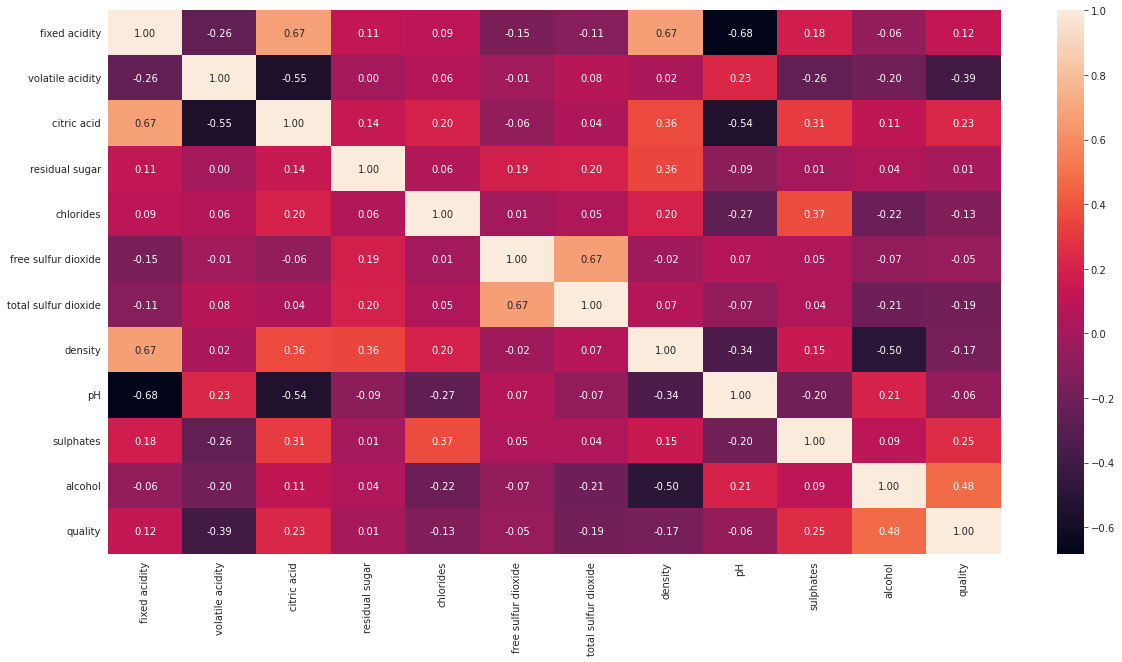

In [ ]:
corr= winedf.corr()

# fig = go.Figure(data=go.Heatmap(x=corr.columns,y=corr.columns,z=corr))
# fig.show()
# First of all I tried to plot it on plotly but I couldnt make it happen so I tried seaborn.

plt.figure(figsize=(20,10))

ax = sns.heatmap(corr, annot=True,fmt='.2f')

In [ ]:
# There are strong correlations between Citric Acid and Fixed Acidity, Density and Fixed Acidity, Total Sulfur Dioxide and Free Sulfur Dioxide. 
# Also there is a strong correlation between quality and alcohol.
# There are negative correlations betweenh pH and fixed acidity, citric acid and volatine acidity, density and alcohol.

# Duplicated Values

In [ ]:
winedf.duplicated().sum()

240

In [ ]:
duplicated = winedf[winedf.duplicated(keep=False)]

In [ ]:
duplicated

fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0               7.4             0.700         0.00  ...       0.56      9.4        5
4               7.4             0.700         0.00  ...       0.56      9.4        5
9               7.5             0.500         0.36  ...       0.80     10.5        5
11              7.5             0.500         0.36  ...       0.80     10.5        5
22              7.9             0.430         0.21  ...       0.91      9.5        5
...             ...               ...          ...  ...        ...      ...      ...
1567            7.2             0.695         0.13  ...       0.54     10.1        5
1579            6.2             0.560         0.09  ...       0.60     11.3        5
1581            6.2             0.560         0.09  ...       0.60     11.3        5
1592            6.3             0.510         0.13  ...       0.75     11.0        6
1596            6.3             0.510         0.13  ...       0.75     11.0        6

[460 rows x 12 columns]

In [ ]:
#Tekrarlayan rowları droplayabiliriz.
winedf.drop_duplicates(inplace=True)

In [ ]:
winedf

fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0               7.4             0.700         0.00  ...       0.56      9.4        5
1               7.8             0.880         0.00  ...       0.68      9.8        5
2               7.8             0.760         0.04  ...       0.65      9.8        5
3              11.2             0.280         0.56  ...       0.58      9.8        6
5               7.4             0.660         0.00  ...       0.56      9.4        5
...             ...               ...          ...  ...        ...      ...      ...
1593            6.8             0.620         0.08  ...       0.82      9.5        6
1594            6.2             0.600         0.08  ...       0.58     10.5        5
1595            5.9             0.550         0.10  ...       0.76     11.2        6
1597            5.9             0.645         0.12  ...       0.71     10.2        5
1598            6.0             0.310         0.47  ...       0.66     11.0        6

[1359 rows x 12 columns]

# Outliers

In [ ]:
plot_rows=2
plot_cols=6
fig = make_subplots(rows=plot_rows, cols=plot_cols)

x = 0
for i in range(1, plot_rows + 1):
    for j in range(1, plot_cols + 1):
        fig.add_trace(go.Box(y=winedf[winedf.columns[x]].values,
                                 name = winedf.columns[x],
                            ),
                     row=i,
                     col=j)

        x=x+1

fig.update_layout(height=900, width=1700)
fig.show()


In [ ]:
winedf.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
winedf["winsorized fixed acidity"] = winsorize(winedf["fixed acidity"], (0, 0.08))
winedf["winsorized volatile acidity"] = winsorize(winedf["volatile acidity"], (0, 0.08))
winedf["winsorized residual sugar"] = winsorize(winedf["residual sugar"], (0, 0.08))
winedf["winsorized chlorides"] = winsorize(winedf["chlorides"], (0, 0.08))
winedf["winsorized free sulfur dioxide"] = winsorize(winedf["free sulfur dioxide"], (0, 0.08))
winedf["winsorized total sulfur dioxide"] = winsorize(winedf["total sulfur dioxide"], (0, 0.08))
winedf["winsorized sulphates"] = winsorize(winedf["sulphates"], (0, 0.08))

In [ ]:
winedf

fixed acidity  ...  winsorized sulphates
0               7.4  ...                  0.56
1               7.8  ...                  0.68
2               7.8  ...                  0.65
3              11.2  ...                  0.58
5               7.4  ...                  0.56
...             ...  ...                   ...
1593            6.8  ...                  0.82
1594            6.2  ...                  0.58
1595            5.9  ...                  0.76
1597            5.9  ...                  0.71
1598            6.0  ...                  0.66

[1359 rows x 19 columns]

In [ ]:
winedf["Log fixed acidity"] = np.log(winedf["fixed acidity"])
winedf["Log volatile acidity"] = np.log(winedf["volatile acidity"])
winedf["Log residual sugar"] = np.log(winedf["residual sugar"])
winedf["Log chlorides"] = np.log(winedf["chlorides"])
winedf["Log free sulfur dioxide"] = np.log(winedf["free sulfur dioxide"])
winedf["Log total sulfur dioxide"] = np.log(winedf["total sulfur dioxide"])
winedf["Log sulphates"] = np.log(winedf["sulphates"])

In [ ]:
plot_rows=4
plot_cols=6
fig = make_subplots(rows=plot_rows, cols=plot_cols)

x = 0
for i in range(1, plot_rows + 1):
    for j in range(1, plot_cols + 1):
        fig.add_trace(go.Box(y=winedf[winedf.columns[x]].values,
                                 name = winedf.columns[x],
                            ),
                     row=i,
                     col=j)

        x=x+1

fig.update_layout(height=900, width=1700)
fig.show()


In [ ]:
#Winsorized versiyonları kullanmaya karar verdim.
winedf["Quality"]=winedf["quality"]
winedf= winedf.drop(["quality",'fixed acidity', 'volatile acidity',"residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","sulphates","Log fixed acidity",
                     "Log residual sugar","Log chlorides","Log free sulfur dioxide","Log total sulfur dioxide","Log sulphates","Log volatile acidity"], axis=1)

In [ ]:
plot_rows=2
plot_cols=6
fig = make_subplots(rows=plot_rows, cols=plot_cols)

x = 0
for i in range(1, plot_rows + 1):
    for j in range(1, plot_cols + 1):
        fig.add_trace(go.Box(y=winedf[winedf.columns[x]].values,
                                 name = winedf.columns[x],
                            ),
                     row=i,
                     col=j)
        x=x+1
fig.update_layout(height=900, width=1700)
fig.show()

In [ ]:
plot_rows=4
plot_cols=3
fig = make_subplots(rows=plot_rows, cols=plot_cols,subplot_titles=("citric acid", "density", "pH",
                                                                   "alcohol","winsorized fixed acidity","winsorized volatile acidity","winsorized residual acidity","winsorized chlorides"
                                                                   ,"winsorized free sulfur dioxide","winsorized total sulfur dioxide","winsorized sulphates","quality"))

x = 0
for i in range(1, plot_rows + 1):
    for j in range(1, plot_cols + 1):
        fig.add_trace(go.Histogram(x=winedf[winedf.columns[x]].values,
                                 name = winedf.columns[x],
                            ),
                     row=i,
                     col=j)

        x=x+1

fig.update_layout(height=900, width=1700)
fig.show()

# **LINEAR MODELLING**

In [ ]:
from sklearn import linear_model
import statsmodels.api as sm

In [ ]:
Y = winedf.iloc[:,-1]
x = winedf.iloc[:,:-1]

lrm = linear_model.LinearRegression()
lrm.fit(x, Y)

x = sm.add_constant(x)
results = sm.OLS(Y, x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Quality   R-squared:                       0.373
Model:                            OLS   Adj. R-squared:                  0.367
Method:                 Least Squares   F-statistic:                     72.69
Date:                Sun, 23 Jan 2022   Prob (F-statistic):          6.04e-128
Time:                        18:39:50   Log-Likelihood:                -1347.4
No. Observations:                1359   AIC:                             2719.
Df Residuals:                    1347   BIC:                             2781.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              23.6273     23.080      1.024      0.306     -21.649      68.903
citric acid                        -0.3401      0.158     -2.153      0.032      -0.650      -0.030
density                           -19.5824     23.528     -0.832      0.405     -65.739      26.574
pH                                 -0.4915      0.196     -2.506      0.012      -0.876      -0.107
alcohol                             0.2672      0.029      9.081      0.000       0.210       0.325
winsorized fixed acidity            0.0324      0.029      1.127      0.260      -0.024       0.089
winsorized volatile acidity        -1.1087      0.154     -7.190      0.000      -1.411      -0.806
winsorized residual sugar           0.0228      0.036      0.626      0.532      -0.049       0.094
winsorized chlorides               -3.4774      1.186     -2.932      0.003      -5.804      -1.151
winsorized free sulfur dioxide      0.0029      0.003      0.993      0.321      -0.003       0.009
winsorized total sulfur dioxide    -0.0026      0.001     -2.624      0.009      -0.004      -0.001
winsorized sulphates                1.6378      0.170      9.662      0.000       1.305       1.970
==============================================================================
Omnibus:                       36.147   Durbin-Watson:                   1.794
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.320
Skew:                          -0.254   Prob(JB):                     1.60e-12
Kurtosis:                       3.837   Cond. No.                     1.05e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
winedf= winedf.drop(['density',"winsorized residual sugar","winsorized fixed acidity"], axis=1)

In [ ]:
Y = winedf.iloc[:,-1]
x = winedf.iloc[:,:-1]

lrm = linear_model.LinearRegression()
lrm.fit(x, Y)

x = sm.add_constant(x)
results = sm.OLS(Y, x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Quality   R-squared:                       0.372
Model:                            OLS   Adj. R-squared:                  0.368
Method:                 Least Squares   F-statistic:                     99.91
Date:                Sun, 23 Jan 2022   Prob (F-statistic):          1.28e-130
Time:                        18:39:50   Log-Likelihood:                -1348.1
No. Observations:                1359   AIC:                             2714.
Df Residuals:                    1350   BIC:                             2761.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               4.7452      0.529      8.970      0.000       3.707       5.783
citric acid                        -0.2901      0.138     -2.095      0.036      -0.562      -0.018
pH                                 -0.6380      0.147     -4.338      0.000      -0.927      -0.349
alcohol                             0.2850      0.019     14.979      0.000       0.248       0.322
winsorized volatile acidity        -1.1071      0.149     -7.412      0.000      -1.400      -0.814
winsorized chlorides               -3.5565      1.149     -3.096      0.002      -5.810      -1.303
winsorized free sulfur dioxide      0.0032      0.003      1.090      0.276      -0.003       0.009
winsorized total sulfur dioxide    -0.0028      0.001     -2.916      0.004      -0.005      -0.001
winsorized sulphates                1.6059      0.162      9.936      0.000       1.289       1.923
==============================================================================
Omnibus:                       34.535   Durbin-Watson:                   1.789
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.997
Skew:                          -0.250   Prob(JB):                     8.44e-12
Kurtosis:                       3.807   Cond. No.                     3.69e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.69e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
winedf

citric acid    pH  ...  winsorized sulphates  Quality
0            0.00  3.51  ...                  0.56        5
1            0.00  3.20  ...                  0.68        5
2            0.04  3.26  ...                  0.65        5
3            0.56  3.16  ...                  0.58        6
5            0.00  3.51  ...                  0.56        5
...           ...   ...  ...                   ...      ...
1593         0.08  3.42  ...                  0.82        6
1594         0.08  3.45  ...                  0.58        5
1595         0.10  3.52  ...                  0.76        6
1597         0.12  3.57  ...                  0.71        5
1598         0.47  3.39  ...                  0.66        6

[1359 rows x 9 columns]

# PCA for Linear Modelling

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse

In [ ]:
y = winedf.iloc[:,-1]
X = winedf.iloc[:,:-1]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=145)

In [ ]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [ ]:
print(X_std)

[[-1.39325797  1.29187216 -0.95437429 ... -0.48067055 -0.38662001
  -0.68023805]
 [-1.39325797 -0.70839548 -0.5845748  ...  1.09460081  0.78369132
   0.30732735]
 [-1.18861732 -0.32124691 -0.5845748  ... -0.03059302  0.32265958
   0.060436  ]
 ...
 [-0.88165635  1.35639693  0.7097234  ...  1.88223649  0.21626765
   0.96570429]
 [-0.77933603  1.67902074 -0.21477532 ...  1.88223649 -0.03198021
   0.5542187 ]
 [ 1.01126962  0.51757501  0.52482366 ...  0.30696513 -0.10290817
   0.14273312]]


In [ ]:
pca = PCA()
X_pca = pca.fit_transform(X_std)

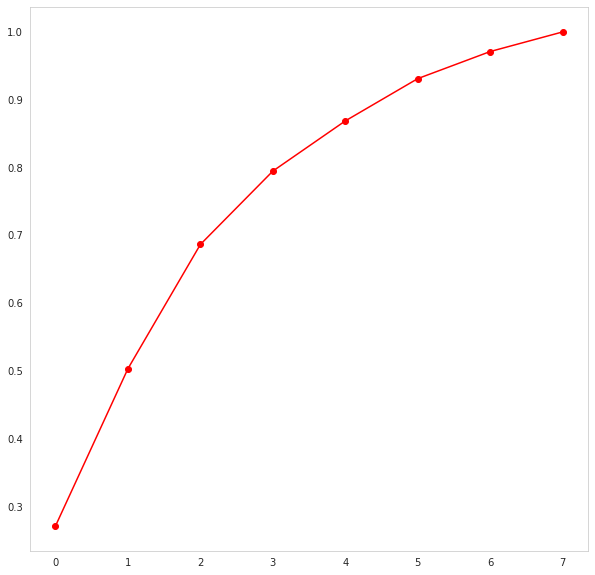

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.grid()

In [ ]:
pca = PCA(n_components = 7)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
print(explained_variance)


[9.54520004e-01 4.41306850e-02 1.23778343e-03 6.88780845e-05
 1.91163881e-05 1.32477337e-05 1.00128044e-05]


In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1087, 7)
(1087,)
(272, 7)
(272,)


# K-Nearest Neighbours (KNN) Regression

In [ ]:
from sklearn import neighbors

In [ ]:
rmse_val = []
for K in range(30):
    K = K+1
    knnmodel = neighbors.KNeighborsRegressor(n_neighbors = K)
    knnmodel.fit(X_train, y_train) 
    pred=knnmodel.predict(X_test)
    knnrmse = mse(y_test,pred)**(1/2) 
    rmse_val.append(rmse_val)
    print('RMSE value for k= ' , K , 'is:', knnrmse)

RMSE value for k=  1 is: 1.0343369572709227
RMSE value for k=  2 is: 0.9412913532826623
RMSE value for k=  3 is: 0.8936504412303007
RMSE value for k=  4 is: 0.8806279093384914
RMSE value for k=  5 is: 0.8606598016159737
RMSE value for k=  6 is: 0.8530749838698677
RMSE value for k=  7 is: 0.8454649161081422
RMSE value for k=  8 is: 0.8403731445368917
RMSE value for k=  9 is: 0.829621362392671
RMSE value for k=  10 is: 0.8176814423578846
RMSE value for k=  11 is: 0.8159319928860925
RMSE value for k=  12 is: 0.817277932501697
RMSE value for k=  13 is: 0.8212872241122956
RMSE value for k=  14 is: 0.826357608277859
RMSE value for k=  15 is: 0.8254133446598035
RMSE value for k=  16 is: 0.8237345464050762
RMSE value for k=  17 is: 0.8212167849831878
RMSE value for k=  18 is: 0.8194582916742954
RMSE value for k=  19 is: 0.8193520532667501
RMSE value for k=  20 is: 0.8187036919998087
RMSE value for k=  21 is: 0.819090978267334
RMSE value for k=  22 is: 0.8178939630290459
RMSE value for k=  23 i

In [ ]:
knnmodel = neighbors.KNeighborsRegressor(n_neighbors = 10 )
knnmodel.fit(X_train, y_train) 
pred=knnmodel.predict(X_test)
knnregrmse = mse(y_test,pred)**(1/2)
print("RMSE of KNN: {:.3f}".format(knnregrmse))


RMSE of KNN: 0.818


In [ ]:
knnmodelw = neighbors.KNeighborsRegressor(n_neighbors = 10,weights='distance' )
knnmodelw.fit(X_train, y_train) 
pred=knnmodelw.predict(X_test)
knnwrmse = mse(y_test,pred)**(1/2)
print("RMSE of KNN Weighted: {:.3f}".format(knnwrmse))

RMSE of KNN Weighted: 0.829


In [ ]:
from sklearn.model_selection import cross_val_score
cvscores3 = cross_val_score(knnmodel, X_test, y_test, cv=3)
print('for cv =  3 -> Average cross validation score : ', np.mean(cvscores3))
cvscores10 = cross_val_score(knnmodel, X_test, y_test, cv=10)
print('for cv = 10 -> Average cross validation score  : ', np.mean(cvscores10))
cvscores20 = cross_val_score(knnmodel, X_test, y_test, cv=20)
print('for cv = 20 -> Average cross validation score  : ', np.mean(cvscores20))

for cv =  3 -> Average cross validation score :  -0.05206349219222769
for cv = 10 -> Average cross validation score  :  -0.030511881571845867
for cv = 20 -> Average cross validation score  :  -0.1652736148089479


In [ ]:
score = cross_val_score(knnmodel, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knnmodelw, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: 0.03 (+/- 0.15)
Weighted Accuracy: 0.04 (+/- 0.17)


# Decision Trees Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as mse

In [ ]:
param_grid={"max_depth" : [1,3,5,7,9],
           "min_samples_leaf":[1,2,3,4,5],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }

In [ ]:
dct_reg = DecisionTreeRegressor()
dct_reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
from sklearn.model_selection import GridSearchCV
griddcreg=GridSearchCV(dct_reg,param_grid=param_grid,scoring='neg_mean_squared_error',cv=3,verbose=3,refit=True)
griddcreg.fit(X_train, y_train)

Fitting 3 folds for each of 1000 candidates, totalling 3000 fits
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1;, score=-0.544 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1;, score=-0.535 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1;, score=-0.544 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=2;, score=-0.544 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=2;, score=-0.535 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=2;, score=-0.544 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=3;, score=-0.544 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=3;, score=-0.535 to

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [1, 3, 5, 7, 9],
                         'max_features': ['auto', 'log2', 'sqrt', None],
                         'max_leaf_nodes': [None, 10, 20, 30, 40, 50, 60, 70,
                                            80, 90],
                         'min_samples_leaf': [1, 2, 3, 4, 5]},
             scoring='neg_mean_squared_error', verbose=3)

In [ ]:
griddcreg.best_params_

{'max_depth': 7,
 'max_features': 'auto',
 'max_leaf_nodes': 10,
 'min_samples_leaf': 1}

In [ ]:
# dct_reg = DecisionTreeRegressor(max_depth=3,max_features="log2",max_leaf_nodes=70,min_samples_leaf=1)
dct_reg = DecisionTreeRegressor(**griddcreg.best_params_)
dct_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=7, max_features='auto', max_leaf_nodes=10)

In [ ]:
y_predict = dct_reg.predict(X_test)
mse_dcr = mse(y_predict, y_test)
rmse_dcr = mse_dcr**(1/2)
print("RMSE of Decision Tree : {:.3f}".format(rmse_dcr))


RMSE of Decision Tree : 0.788


# Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train) 

RandomForestRegressor()

In [ ]:
param_grid = {
    'max_depth': [80, 90],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 500]
}

In [ ]:
gridrfreg=GridSearchCV(rf_reg,param_grid=param_grid,scoring='neg_mean_squared_error',cv=2,verbose=3,refit=True)
gridrfreg.fit(X_train, y_train)

Fitting 2 folds for each of 72 candidates, totalling 144 fits
[CV 1/2] END max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100;, score=-0.443 total time=   0.2s
[CV 2/2] END max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100;, score=-0.419 total time=   0.2s
[CV 1/2] END max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200;, score=-0.443 total time=   0.3s
[CV 2/2] END max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200;, score=-0.419 total time=   0.3s
[CV 1/2] END max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=500;, score=-0.443 total time=   0.8s
[CV 2/2] END max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=500;, score=-0.417 total time=   0.8s
[CV 1/2] END max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100;, score=-0.445 total time=

GridSearchCV(cv=2, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [80, 90], 'max_features': [2, 3],
                         'min_samples_leaf': [3, 4],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 500]},
             scoring='neg_mean_squared_error', verbose=3)

In [ ]:
gridrfreg.best_params_

{'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 200}

In [ ]:
rf_reg = RandomForestRegressor(**gridrfreg.best_params_)
rf_reg.fit(X_train, y_train) 

RandomForestRegressor(max_depth=80, max_features=3, min_samples_leaf=3,
                      min_samples_split=8, n_estimators=200)

In [ ]:
y_predict = rf_reg.predict(X_test)
rmse_rfr = mse(y_test, y_predict)**(1/2)
print("RMSE of Random Forrest: {:.3f}".format(rmse_rfr))

RMSE of Random Forrest: 0.696


# Support Vector Regression (SVR)

In [ ]:
from sklearn.svm import SVR

In [ ]:
svr_reg = SVR()
svr_reg.fit(X_train, y_train) 

SVR()

In [ ]:
param_grid = {'kernel': ('linear', 'rbf','poly'), 'C':[1.5, 10],'gamma': [1e-7, 1e-4],'epsilon':[0.1,0.3,0.5]}


In [ ]:
gridsvrreg = GridSearchCV(svr_reg, param_grid,scoring='neg_mean_squared_error',cv=2,verbose=3,refit=True)
gridsvrreg.fit(X_train, y_train)

Fitting 2 folds for each of 36 candidates, totalling 72 fits
[CV 1/2] END C=1.5, epsilon=0.1, gamma=1e-07, kernel=linear;, score=-0.445 total time=   0.9s
[CV 2/2] END C=1.5, epsilon=0.1, gamma=1e-07, kernel=linear;, score=-0.433 total time=   1.0s
[CV 1/2] END C=1.5, epsilon=0.1, gamma=1e-07, kernel=rbf;, score=-0.749 total time=   0.0s
[CV 2/2] END C=1.5, epsilon=0.1, gamma=1e-07, kernel=rbf;, score=-0.658 total time=   0.0s
[CV 1/2] END C=1.5, epsilon=0.1, gamma=1e-07, kernel=poly;, score=-0.764 total time=   0.0s
[CV 2/2] END C=1.5, epsilon=0.1, gamma=1e-07, kernel=poly;, score=-0.670 total time=   0.0s
[CV 1/2] END C=1.5, epsilon=0.1, gamma=0.0001, kernel=linear;, score=-0.445 total time=   0.9s
[CV 2/2] END C=1.5, epsilon=0.1, gamma=0.0001, kernel=linear;, score=-0.433 total time=   0.9s
[CV 1/2] END C=1.5, epsilon=0.1, gamma=0.0001, kernel=rbf;, score=-0.662 total time=   0.0s
[CV 2/2] END C=1.5, epsilon=0.1, gamma=0.0001, kernel=rbf;, score=-0.584 total time=   0.0s
[CV 1/2] EN

GridSearchCV(cv=2, estimator=SVR(),
             param_grid={'C': [1.5, 10], 'epsilon': [0.1, 0.3, 0.5],
                         'gamma': [1e-07, 0.0001],
                         'kernel': ('linear', 'rbf', 'poly')},
             scoring='neg_mean_squared_error', verbose=3)

In [ ]:
gridsvrreg.best_params_

{'C': 10, 'epsilon': 0.3, 'gamma': 1e-07, 'kernel': 'linear'}

In [ ]:
svr = SVR(**gridsvrreg.best_params_)
svr.fit(X_train, y_train) 

SVR(C=10, epsilon=0.3, gamma=1e-07, kernel='linear')

In [ ]:
y_predict = svr.predict(X_test)
rmse_svr = mse(y_test, y_predict)**(1/2)
print("RMSE of SVR: {:.3f}".format(rmse_svr))

RMSE of SVR: 0.680


# XGBoost Regression

In [ ]:
import xgboost as xgb

In [ ]:
xgb_reg = xgb.XGBRegressor(objective ='reg:squarederror', seed=145)
xgb_reg.fit(X_train,y_train)

XGBRegressor(objective='reg:squarederror', seed=145)

In [ ]:
param_grid = {
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [100, 200, 500],
        'objective': ['reg:squarederror']
}

In [ ]:
gridxgbr=GridSearchCV(xgb_reg,param_grid=param_grid,scoring='neg_mean_squared_error',cv=2,verbose=3,refit=True)
gridxgbr.fit(X_train, y_train)

Fitting 2 folds for each of 216 candidates, totalling 432 fits
[CV 1/2] END colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.5;, score=-3.952 total time=   0.0s
[CV 2/2] END colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.5;, score=-4.333 total time=   0.0s
[CV 1/2] END colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.7;, score=-3.915 total time=   0.0s
[CV 2/2] END colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.7;, score=-4.312 total time=   0.0s
[CV 1/2] END colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.5;, score=-0.925 total time=   0.1s
[CV 2/2] END colsample_bytr

GridSearchCV(cv=2,
             estimator=XGBRegressor(objective='reg:squarederror', seed=145),
             param_grid={'colsample_bytree': [0.5, 0.7],
                         'learning_rate': [0.01, 0.1], 'max_depth': [3, 5, 7],
                         'min_child_weight': [1, 3, 5],
                         'n_estimators': [100, 200, 500],
                         'objective': ['reg:squarederror'],
                         'subsample': [0.5, 0.7]},
             scoring='neg_mean_squared_error', verbose=3)

In [ ]:
xgb_reg = xgb.XGBRegressor(**gridsvrreg.best_params_)
xgb_reg.fit(X_train,y_train)

[18:43:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(C=10, epsilon=0.3, gamma=1e-07, kernel='linear')

In [ ]:
y_predict = xgb_reg.predict(X_test)
xgbregrmse = np.sqrt(mse(y_test, y_predict))
print("RMSE of XGBoost: {:.3f}".format(xgbregrmse))

RMSE of XGBoost: 0.693


# Light GBM Regression

In [ ]:
import lightgbm as lgb

In [ ]:
d_train = lgb.Dataset(X_train, label=y_train)

In [ ]:
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'rmsle',
    'max_depth': 6, 
    'learning_rate': 0.1,
    'num_leaves':128,
    'force_row_wise':True,
    'verbose': -1}
n_estimators = 100

In [ ]:
lgb_reg_model = lgb.train(params, d_train, num_boost_round = 100)
y_predict = lgb_reg_model.predict(X_test)
y_predict_train = lgb_reg_model.predict(X_train)

lgbregrmse = np.sqrt(mse(y_test, y_predict))
print("RMSE of Light GBM: {:.3f}".format(lgbregrmse))

RMSE of Light GBM: 0.716


# Conclusion for Regression

In [ ]:
print("RMSE of KNN: {:.3f}".format(knnregrmse))
print("RMSE of Decision Tree : {:.3f}".format(rmse_dcr))
print("RMSE of Random Forrest : {:.3f}".format(rmse_rfr))
print("RMSE of SVR : {:.3f}".format(rmse_svr))
print("RMSE of XGBoost: {:.3f}".format(xgbregrmse))
print("RMSE of Light GBM: {:.3f}".format(lgbregrmse))

RMSE of KNN: 0.818
RMSE of Decision Tree : 0.788
RMSE of Random Forrest : 0.696
RMSE of SVR : 0.680
RMSE of XGBoost: 0.693
RMSE of Light GBM: 0.716


In [ ]:
regmethods = ["KNN"," Decision Tree" ," Random Forrest ","SVR ","XGBoost", "Light GBM"]
rmsevalues = [knnregrmse,rmse_dcr,rmse_rfr,rmse_svr,xgbregrmse,lgbregrmse]
fig = px.bar(x=regmethods, y=rmsevalues, color=regmethods,text=rmsevalues,
             title="RMSE Values of The Regression Methods")
fig.show()

In [ ]:
#We can use SVR, Random Forrest or XGBoost for the Regression.

# **CLASSIFICATION**

In [ ]:
winedf

citric acid    pH  ...  winsorized sulphates  Quality
0            0.00  3.51  ...                  0.56        5
1            0.00  3.20  ...                  0.68        5
2            0.04  3.26  ...                  0.65        5
3            0.56  3.16  ...                  0.58        6
5            0.00  3.51  ...                  0.56        5
...           ...   ...  ...                   ...      ...
1593         0.08  3.42  ...                  0.82        6
1594         0.08  3.45  ...                  0.58        5
1595         0.10  3.52  ...                  0.76        6
1597         0.12  3.57  ...                  0.71        5
1598         0.47  3.39  ...                  0.66        6

[1359 rows x 9 columns]

In [ ]:
winedf['Quality'].value_counts()

5    577
6    535
7    167
4     53
8     17
3     10
Name: Quality, dtype: int64

In [ ]:
bins = (2, 5.5, 8)
cat_names = ['bad',"good"]
winedf['Quality'] = pd.cut(winedf['Quality'], bins = bins, labels = cat_names)

#Feature Transformation...
winedf['Quality'].replace({'bad':0, 'good':1}, inplace=True)


In [ ]:
fig=px.histogram(winedf, x="Quality", color="Quality",color_discrete_sequence=px.colors.sequential.Plasma_r)
fig.show()

# PCA for Classification

In [ ]:
y = winedf.iloc[:,-1]
X = winedf.iloc[:,:-1]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=145)

In [ ]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [ ]:
print(X_std)

[[-1.39325797  1.29187216 -0.95437429 ... -0.48067055 -0.38662001
  -0.68023805]
 [-1.39325797 -0.70839548 -0.5845748  ...  1.09460081  0.78369132
   0.30732735]
 [-1.18861732 -0.32124691 -0.5845748  ... -0.03059302  0.32265958
   0.060436  ]
 ...
 [-0.88165635  1.35639693  0.7097234  ...  1.88223649  0.21626765
   0.96570429]
 [-0.77933603  1.67902074 -0.21477532 ...  1.88223649 -0.03198021
   0.5542187 ]
 [ 1.01126962  0.51757501  0.52482366 ...  0.30696513 -0.10290817
   0.14273312]]


In [ ]:
pca = PCA(n_components = 8)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[9.54520004e-01 4.41306850e-02 1.23778343e-03 6.88780845e-05
 1.91163881e-05 1.32477337e-05 1.00128044e-05 2.72388230e-07]


# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

logisticreg = LogisticRegression(solver='liblinear')
logisticreg.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [ ]:
from sklearn.metrics import accuracy_score

test_score_logic = accuracy_score(y_test, logisticreg.predict(X_test)) * 100
train_score = accuracy_score(y_train, logisticreg.predict(X_train)) * 100

results_df = pd.DataFrame(data=[["Logistic Regression", train_score, test_score_logic]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df

Model  Training Accuracy %  Testing Accuracy %
0  Logistic Regression            74.057038           75.367647

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report
y_pred = logisticreg.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.77      0.74       122
           1       0.80      0.74      0.77       150

    accuracy                           0.75       272
   macro avg       0.75      0.76      0.75       272
weighted avg       0.76      0.75      0.75       272



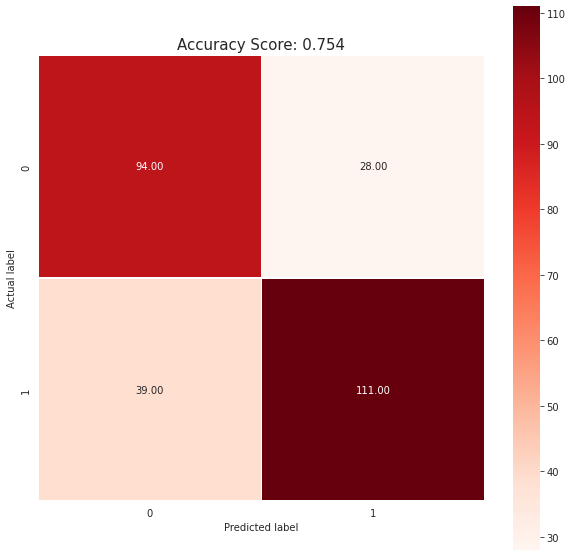

In [ ]:
predictionsreg = logisticreg.predict(X_test)
logisticregscore = logisticreg.score(X_test, y_test)
cm = metrics.confusion_matrix(y_test, predictionsreg)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt=".2f", linewidths=.5, square = True, cmap = 'Reds');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0:.3f}'.format(logisticregscore)
plt.title(all_sample_title, size = 15);

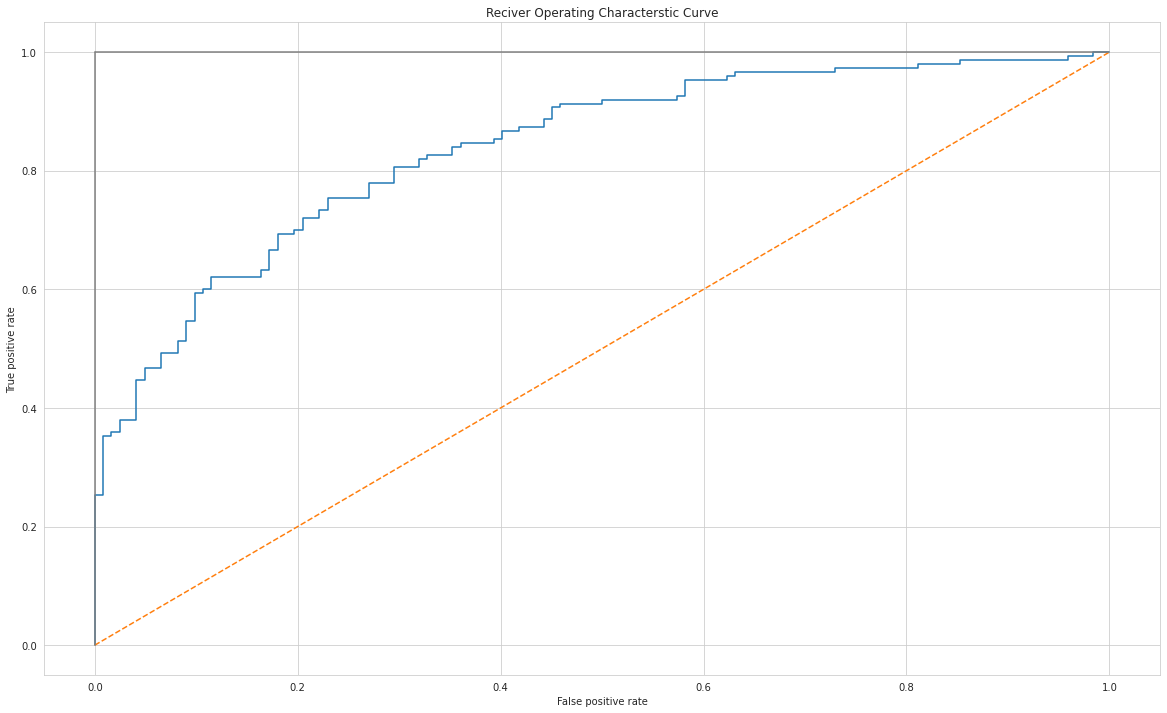

In [ ]:
from sklearn.metrics import roc_auc_score,roc_curve
target_probailities_log = logisticreg.predict_proba(X_test)[:,1]
log_false_positive_rate,log_true_positive_rate,log_threshold = roc_curve(y_test,
                                                             target_probailities_log)
sns.set_style('whitegrid')
plt.figure(figsize=(20,12))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(log_false_positive_rate,log_true_positive_rate)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()

In [ ]:
LOGRoc = roc_auc_score(y_test,target_probailities_log)
LOGRoc

0.8378688524590164

# K-Nearest Neighbours (KNN) Classification

In [ ]:
rmse_val = []
for K in range(30):
    K = K+1
    knnmodel = neighbors.KNeighborsClassifier(n_neighbors = K)
    knnmodel.fit(X_train, y_train) 
    pred=knnmodel.predict(X_test)
    knnrmse = mse(y_test,pred)**(1/2) 
    rmse_val.append(rmse_val)
    print('RMSE value for k= ' , K , 'is:', knnrmse)

RMSE value for k=  1 is: 0.6153669397914022
RMSE value for k=  2 is: 0.6330365661773789
RMSE value for k=  3 is: 0.5909862146297093
RMSE value for k=  4 is: 0.6153669397914022
RMSE value for k=  5 is: 0.568796458994521
RMSE value for k=  6 is: 0.5752237416355278
RMSE value for k=  7 is: 0.5752237416355278
RMSE value for k=  8 is: 0.5720191276110801
RMSE value for k=  9 is: 0.5815799980377997
RMSE value for k=  10 is: 0.5815799980377997
RMSE value for k=  11 is: 0.5847322162373836
RMSE value for k=  12 is: 0.5784106011557981
RMSE value for k=  13 is: 0.5878675320972554
RMSE value for k=  14 is: 0.5971747207131457
RMSE value for k=  15 is: 0.5940885257860046
RMSE value for k=  16 is: 0.5971747207131457
RMSE value for k=  17 is: 0.5847322162373836
RMSE value for k=  18 is: 0.5847322162373836
RMSE value for k=  19 is: 0.5909862146297093
RMSE value for k=  20 is: 0.5971747207131457
RMSE value for k=  21 is: 0.600245047998781
RMSE value for k=  22 is: 0.5940885257860046
RMSE value for k=  23

In [ ]:
knnclass = neighbors.KNeighborsClassifier(n_neighbors = 21 )
knnclass.fit(X_train, y_train) 
knnclasssc=knnclass.score(X_test, y_test)

print("Score of KNN: {:.3f}".format(knnclasssc))


Score of KNN: 0.640


In [ ]:
from sklearn.model_selection import cross_val_score
cvscores3 = cross_val_score(knnclass, X_test, y_test, cv=3)
print('for cv =  3 -> Average cross validation score : ', np.mean(cvscores3))
cvscores10 = cross_val_score(knnclass, X_test, y_test, cv=10)
print('for cv = 10 -> Average cross validation score  : ', np.mean(cvscores10))
cvscores20 = cross_val_score(knnclass, X_test, y_test, cv=20)
print('for cv = 20 -> Average cross validation score  : ', np.mean(cvscores20))

for cv =  3 -> Average cross validation score :  0.5956450956450957
for cv = 10 -> Average cross validation score  :  0.6105820105820106
for cv = 20 -> Average cross validation score  :  0.6206043956043955


In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report
y_pred = knnclass.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.60      0.60       122
           1       0.67      0.67      0.67       150

    accuracy                           0.64       272
   macro avg       0.64      0.64      0.64       272
weighted avg       0.64      0.64      0.64       272



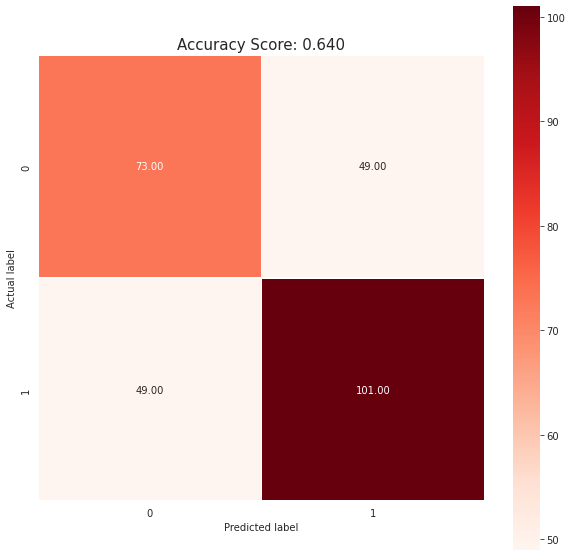

In [ ]:
predictionsknnc = knnclass.predict(X_test)
knnclassscore = knnclass.score(X_test, y_test)
cm = metrics.confusion_matrix(y_test, predictionsknnc)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt=".2f", linewidths=.5, square = True, cmap = 'Reds');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0:.3f}'.format(knnclassscore)
plt.title(all_sample_title, size = 15);

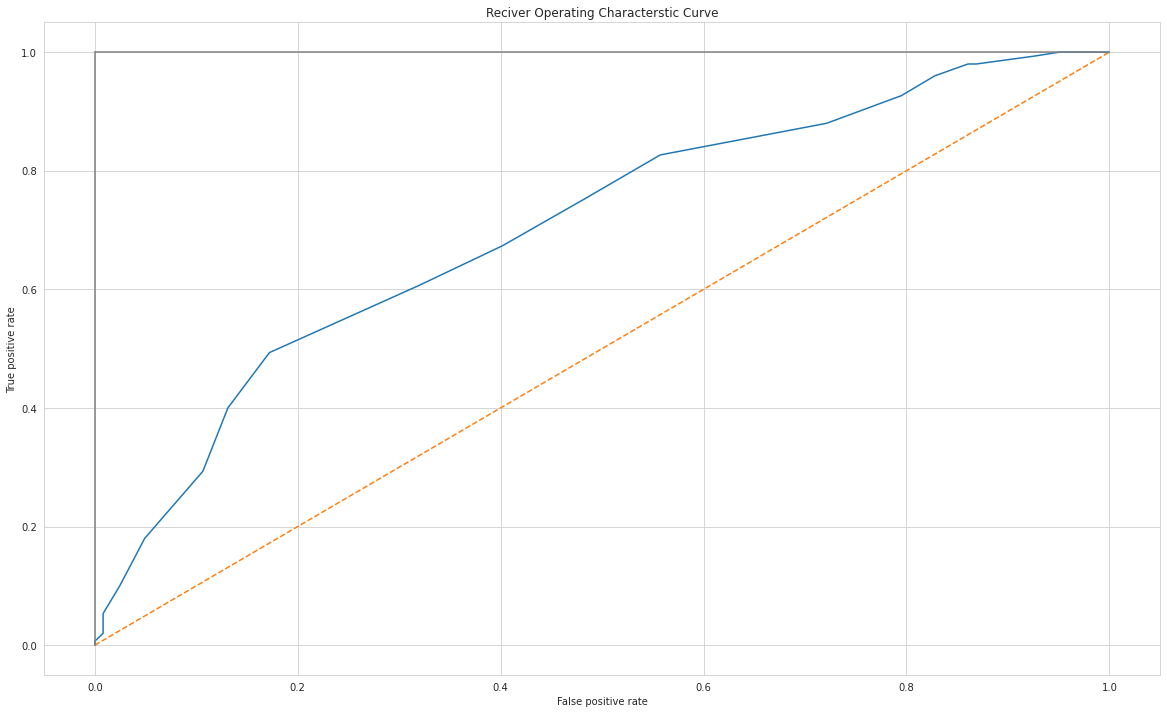

In [ ]:
from sklearn.metrics import roc_auc_score,roc_curve
target_probailities_knn = knnclass.predict_proba(X_test)[:,1]
log_false_positive_rate,log_true_positive_rate,log_threshold = roc_curve(y_test,
                                                             target_probailities_knn)
sns.set_style('whitegrid')
plt.figure(figsize=(20,12))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(log_false_positive_rate,log_true_positive_rate)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()

In [ ]:
KNNRoc = roc_auc_score(y_test,target_probailities_knn)
KNNRoc

0.703169398907104

# Decision Trees Classification

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
param_grid = {"criterion":("gini", "entropy"), 
          "splitter":("best", "random"), 
           "max_depth" : [1,3,5,7,9],
           "min_samples_leaf":[1,3,5,10],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90]}

In [ ]:
dc_class = DecisionTreeClassifier()
dc_class.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
griddcclass=GridSearchCV(dc_class,param_grid=param_grid,scoring='accuracy',cv=2,verbose=3,refit=True)
griddcclass.fit(X_train, y_train)

Fitting 2 folds for each of 800 candidates, totalling 1600 fits
[CV 1/2] END criterion=gini, max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=best;, score=0.658 total time=   0.0s
[CV 2/2] END criterion=gini, max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=best;, score=0.643 total time=   0.0s
[CV 1/2] END criterion=gini, max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=random;, score=0.642 total time=   0.0s
[CV 2/2] END criterion=gini, max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=random;, score=0.540 total time=   0.0s
[CV 1/2] END criterion=gini, max_depth=1, max_leaf_nodes=None, min_samples_leaf=3, splitter=best;, score=0.658 total time=   0.0s
[CV 2/2] END criterion=gini, max_depth=1, max_leaf_nodes=None, min_samples_leaf=3, splitter=best;, score=0.643 total time=   0.0s
[CV 1/2] END criterion=gini, max_depth=1, max_leaf_nodes=None, min_samples_leaf=3, splitter=random;, score=0.662 total time=   0.0s
[CV 2/2] END criteri

GridSearchCV(cv=2, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [1, 3, 5, 7, 9],
                         'max_leaf_nodes': [None, 10, 20, 30, 40, 50, 60, 70,
                                            80, 90],
                         'min_samples_leaf': [1, 3, 5, 10],
                         'splitter': ('best', 'random')},
             scoring='accuracy', verbose=3)

In [ ]:
griddcclass.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'max_leaf_nodes': 30,
 'min_samples_leaf': 10,
 'splitter': 'random'}

In [ ]:
dct_class = DecisionTreeClassifier(**griddcclass.best_params_)
dct_class.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=9, max_leaf_nodes=30, min_samples_leaf=10,
                       splitter='random')

In [ ]:
y_pred = dct_class.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.67      0.68       122
           1       0.74      0.75      0.74       150

    accuracy                           0.71       272
   macro avg       0.71      0.71      0.71       272
weighted avg       0.71      0.71      0.71       272



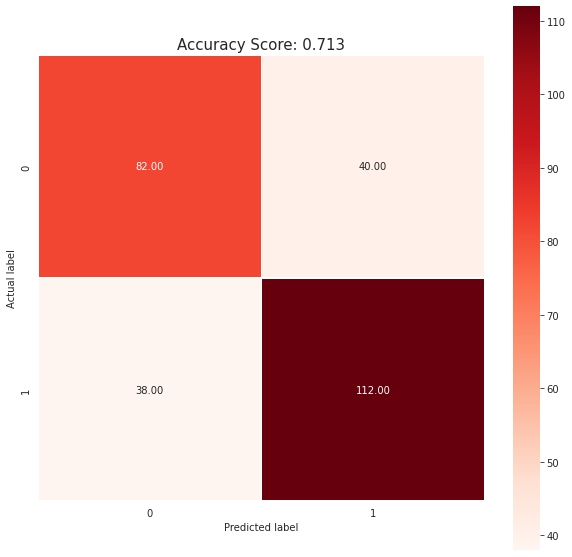

In [ ]:
predictionsdctc = dct_class.predict(X_test)
dct_classscore = dct_class.score(X_test, y_test)
cm = metrics.confusion_matrix(y_test, predictionsdctc)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt=".2f", linewidths=.5, square = True, cmap = 'Reds');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0:.3f}'.format(dct_classscore)
plt.title(all_sample_title, size = 15);

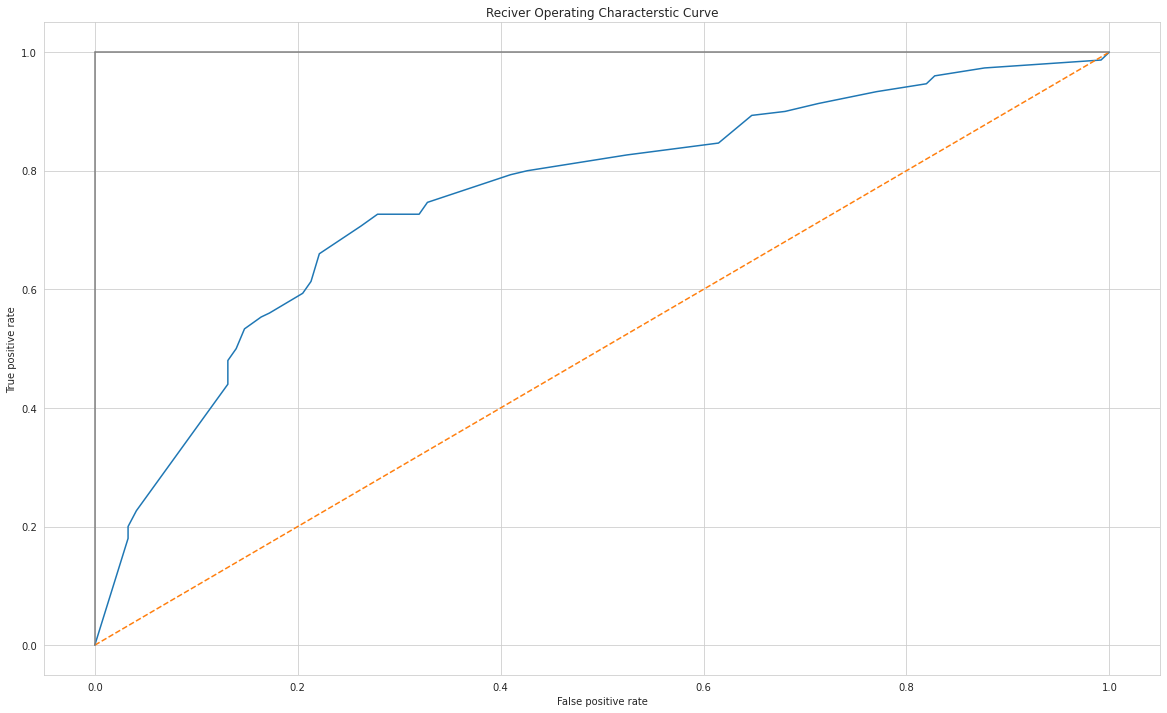

In [ ]:
target_probailities_dtc = dct_class.predict_proba(X_test)[:,1]
log_false_positive_rate,log_true_positive_rate,log_threshold = roc_curve(y_test,
                                                             target_probailities_dtc)
sns.set_style('whitegrid')
plt.figure(figsize=(20,12))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(log_false_positive_rate,log_true_positive_rate)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()

In [ ]:
DCTRoc = roc_auc_score(y_test,target_probailities_dtc)
DCTRoc

0.7555464480874317

# Random Forest Classification

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
param_grid = {"max_depth": [None],
              "min_samples_split": [2, 5, 20],
              "min_samples_leaf": [1, 5, 15],
              "n_estimators" :[100,200,300,400],
              "criterion": ["gini"]}

In [ ]:
gridrfc = GridSearchCV(rfc,param_grid=param_grid,cv=2,scoring="accuracy",verbose=3)
gridrfc.fit(X_train, y_train)

Fitting 2 folds for each of 36 candidates, totalling 72 fits
[CV 1/2] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.728 total time=   0.2s
[CV 2/2] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.724 total time=   0.2s
[CV 1/2] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.733 total time=   0.4s
[CV 2/2] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.729 total time=   0.4s
[CV 1/2] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300;, score=0.733 total time=   0.6s
[CV 2/2] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300;, score=0.727 total time=   0.6s
[CV 1/2] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=400;, score=0.746 total 

GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini'], 'max_depth': [None],
                         'min_samples_leaf': [1, 5, 15],
                         'min_samples_split': [2, 5, 20],
                         'n_estimators': [100, 200, 300, 400]},
             scoring='accuracy', verbose=3)

In [ ]:
gridrfc.best_params_

{'criterion': 'gini',
 'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 400}

In [ ]:
rfc = RandomForestClassifier(**gridrfc.best_params_)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=400)

In [ ]:
y_pred = rfc.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.77      0.73       122
           1       0.80      0.73      0.76       150

    accuracy                           0.75       272
   macro avg       0.75      0.75      0.75       272
weighted avg       0.75      0.75      0.75       272



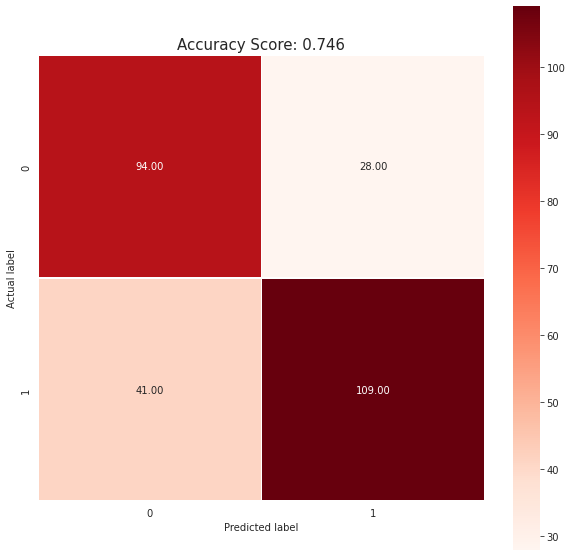

In [ ]:
predictionsrfc = rfc.predict(X_test)
rfcscore = rfc.score(X_test, y_test)
cm = metrics.confusion_matrix(y_test, predictionsrfc)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt=".2f", linewidths=.5, square = True, cmap = 'Reds');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0:.3f}'.format(rfcscore)
plt.title(all_sample_title, size = 15);

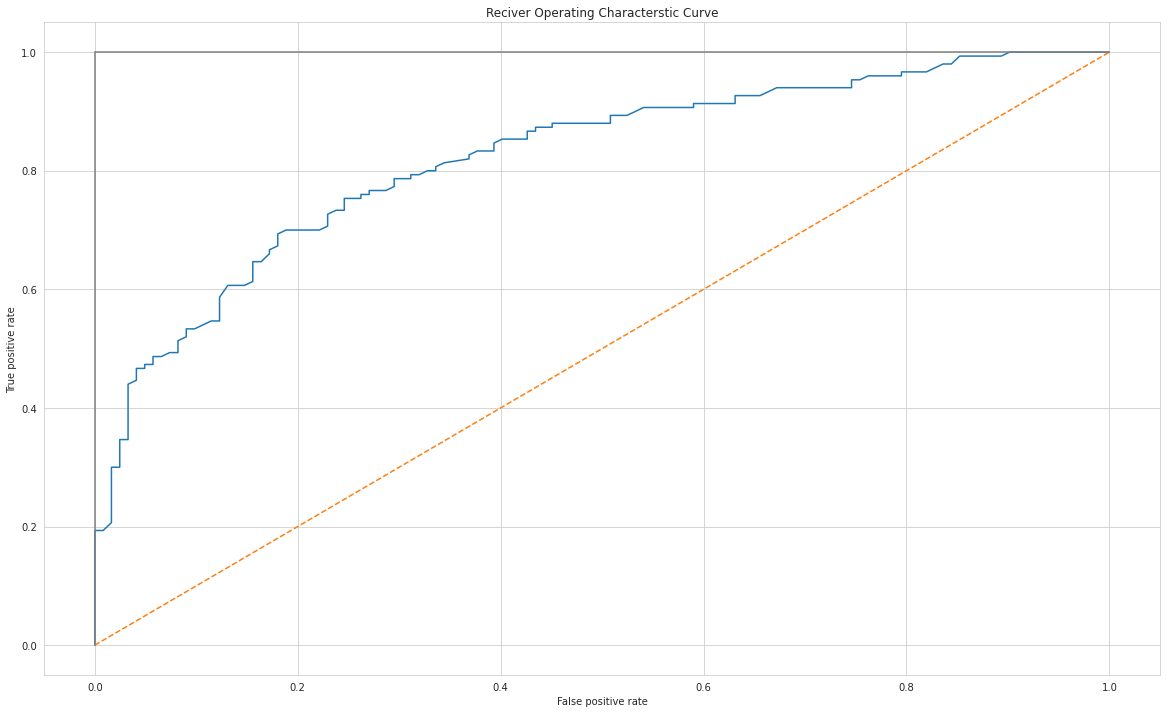

In [ ]:
target_probailities_rfc = rfc.predict_proba(X_test)[:,1]
log_false_positive_rate,log_true_positive_rate,log_threshold = roc_curve(y_test,target_probailities_rfc)
sns.set_style('whitegrid')
plt.figure(figsize=(20,12))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(log_false_positive_rate,log_true_positive_rate)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()

In [ ]:
RFCRoc = roc_auc_score(y_test,target_probailities_rfc)
RFCRoc

0.8223224043715848

# Support Vector Classification (SVC)

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [ ]:
param_grid = {'kernel': ('linear', 'rbf','poly'), 'C':[1.5, 10],'gamma': [1e-7, 1e-4]}

In [ ]:
gridsvr=GridSearchCV(svc,param_grid=param_grid,scoring='accuracy',cv=2,verbose=3,refit=True)
gridsvr.fit(X_train, y_train)

Fitting 2 folds for each of 12 candidates, totalling 24 fits
[CV 1/2] END .C=1.5, gamma=1e-07, kernel=linear;, score=0.733 total time=   0.1s
[CV 2/2] END .C=1.5, gamma=1e-07, kernel=linear;, score=0.735 total time=   0.1s
[CV 1/2] END ....C=1.5, gamma=1e-07, kernel=rbf;, score=0.524 total time=   0.0s
[CV 2/2] END ....C=1.5, gamma=1e-07, kernel=rbf;, score=0.523 total time=   0.0s
[CV 1/2] END ...C=1.5, gamma=1e-07, kernel=poly;, score=0.524 total time=   0.0s
[CV 2/2] END ...C=1.5, gamma=1e-07, kernel=poly;, score=0.523 total time=   0.0s
[CV 1/2] END C=1.5, gamma=0.0001, kernel=linear;, score=0.733 total time=   0.1s
[CV 2/2] END C=1.5, gamma=0.0001, kernel=linear;, score=0.735 total time=   0.1s
[CV 1/2] END ...C=1.5, gamma=0.0001, kernel=rbf;, score=0.597 total time=   0.0s
[CV 2/2] END ...C=1.5, gamma=0.0001, kernel=rbf;, score=0.624 total time=   0.0s
[CV 1/2] END ..C=1.5, gamma=0.0001, kernel=poly;, score=0.586 total time=   0.0s
[CV 2/2] END ..C=1.5, gamma=0.0001, kernel=poly;

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [1.5, 10], 'gamma': [1e-07, 0.0001],
                         'kernel': ('linear', 'rbf', 'poly')},
             scoring='accuracy', verbose=3)

In [ ]:
gridsvr.best_params_

{'C': 10, 'gamma': 1e-07, 'kernel': 'linear'}

In [ ]:
svc = SVC(**gridsvr.best_params_,probability=True)
svc.fit(X_train, y_train)

SVC(C=10, gamma=1e-07, kernel='linear', probability=True)

In [ ]:
y_pred = svc.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.79      0.73       122
           1       0.80      0.70      0.75       150

    accuracy                           0.74       272
   macro avg       0.74      0.74      0.74       272
weighted avg       0.75      0.74      0.74       272



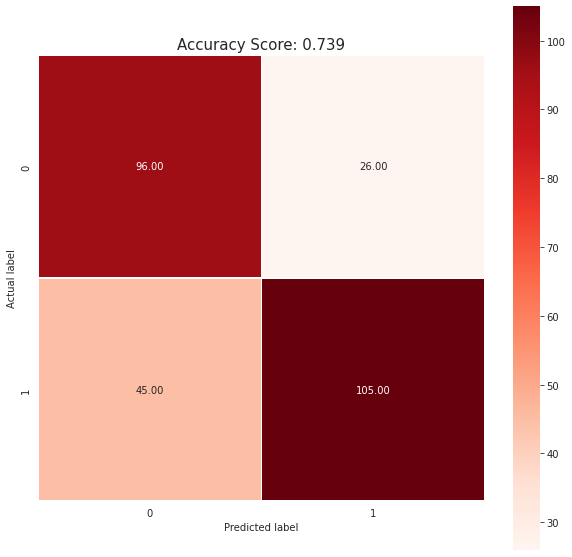

In [ ]:
predictionssvc = svc.predict(X_test)
svcscore = svc.score(X_test, y_test)
cm = metrics.confusion_matrix(y_test, predictionssvc)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt=".2f", linewidths=.5, square = True, cmap = 'Reds');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0:.3f}'.format(svcscore)
plt.title(all_sample_title, size = 15);

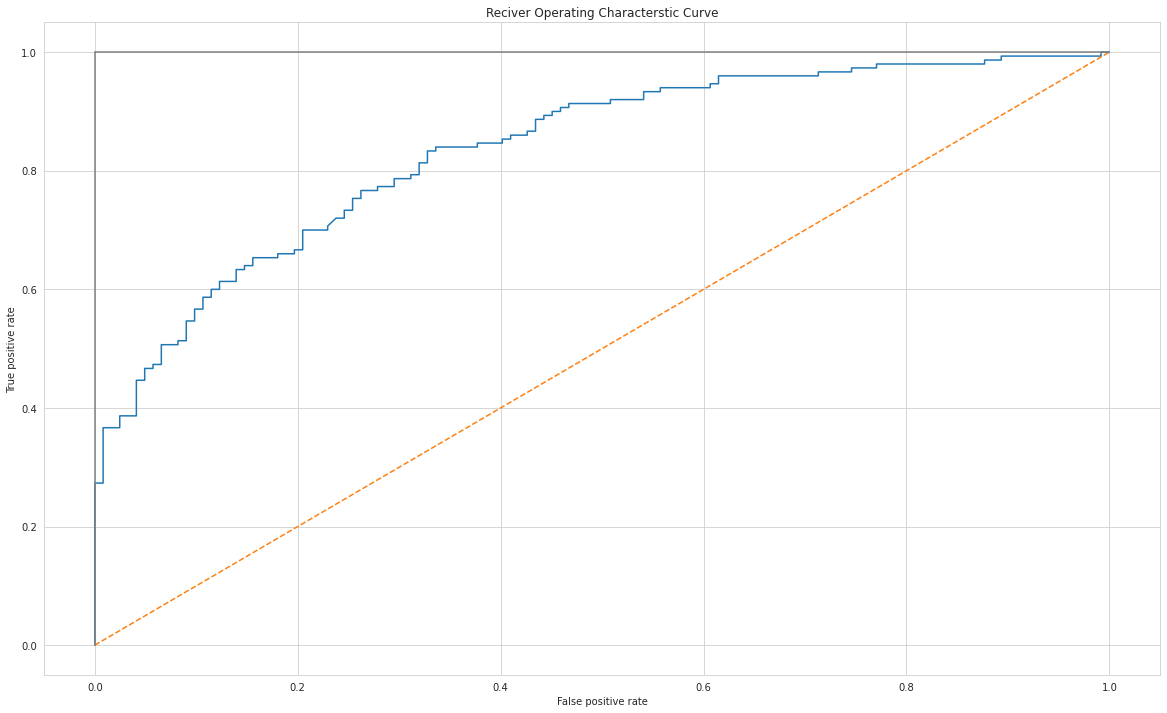

In [ ]:
target_probailities_svc = svc.predict_proba(X_test)[:,1]
log_false_positive_rate,log_true_positive_rate,log_threshold = roc_curve(y_test,target_probailities_svc)
sns.set_style('whitegrid')
plt.figure(figsize=(20,12))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(log_false_positive_rate,log_true_positive_rate)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()

In [ ]:
SVCRoc = roc_auc_score(y_test,target_probailities_svc)
SVCRoc

0.8357377049180328

# XGBOOST Classification

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgbc = XGBClassifier()
xgbc.fit(X_train, y_train)

XGBClassifier()

In [ ]:
param_grid = {'max_depth' : [3, 5, 7],'n_estimators': [60, 100, 140],'learning_rate': [0.01, 0.1]}

In [ ]:
gridxgbc=GridSearchCV(xgbc,param_grid=param_grid,scoring='accuracy',cv=2,verbose=3,refit=True)
gridxgbc.fit(X_train, y_train)

Fitting 2 folds for each of 18 candidates, totalling 36 fits
[CV 1/2] END learning_rate=0.01, max_depth=3, n_estimators=60;, score=0.697 total time=   0.0s
[CV 2/2] END learning_rate=0.01, max_depth=3, n_estimators=60;, score=0.681 total time=   0.0s
[CV 1/2] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.689 total time=   0.0s
[CV 2/2] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.698 total time=   0.0s
[CV 1/2] END learning_rate=0.01, max_depth=3, n_estimators=140;, score=0.704 total time=   0.1s
[CV 2/2] END learning_rate=0.01, max_depth=3, n_estimators=140;, score=0.705 total time=   0.1s
[CV 1/2] END learning_rate=0.01, max_depth=5, n_estimators=60;, score=0.721 total time=   0.0s
[CV 2/2] END learning_rate=0.01, max_depth=5, n_estimators=60;, score=0.689 total time=   0.0s
[CV 1/2] END learning_rate=0.01, max_depth=5, n_estimators=100;, score=0.722 total time=   0.1s
[CV 2/2] END learning_rate=0.01, max_depth=5, n_estimators=100;, score=0.703 to

GridSearchCV(cv=2, estimator=XGBClassifier(),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [3, 5, 7],
                         'n_estimators': [60, 100, 140]},
             scoring='accuracy', verbose=3)

In [ ]:
gridxgbc.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 60}

In [ ]:
xgbc = XGBClassifier(**gridxgbc.best_params_)
xgbc.fit(X_train, y_train)

XGBClassifier(n_estimators=60)

In [ ]:
y_pred = xgbc.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.74      0.72       122
           1       0.78      0.75      0.77       150

    accuracy                           0.75       272
   macro avg       0.74      0.75      0.74       272
weighted avg       0.75      0.75      0.75       272



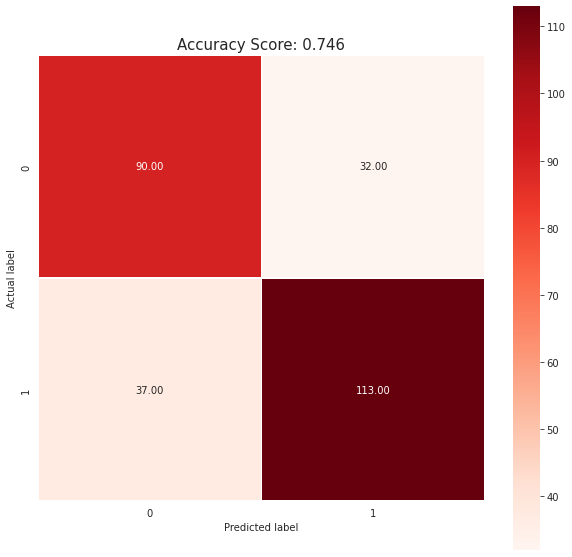

In [ ]:
predictionsxgbc = xgbc.predict(X_test)
xgbcscore = xgbc.score(X_test, y_test)
cm = metrics.confusion_matrix(y_test, predictionsxgbc)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt=".2f", linewidths=.5, square = True, cmap = 'Reds');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0:.3f}'.format(xgbcscore)
plt.title(all_sample_title, size = 15);

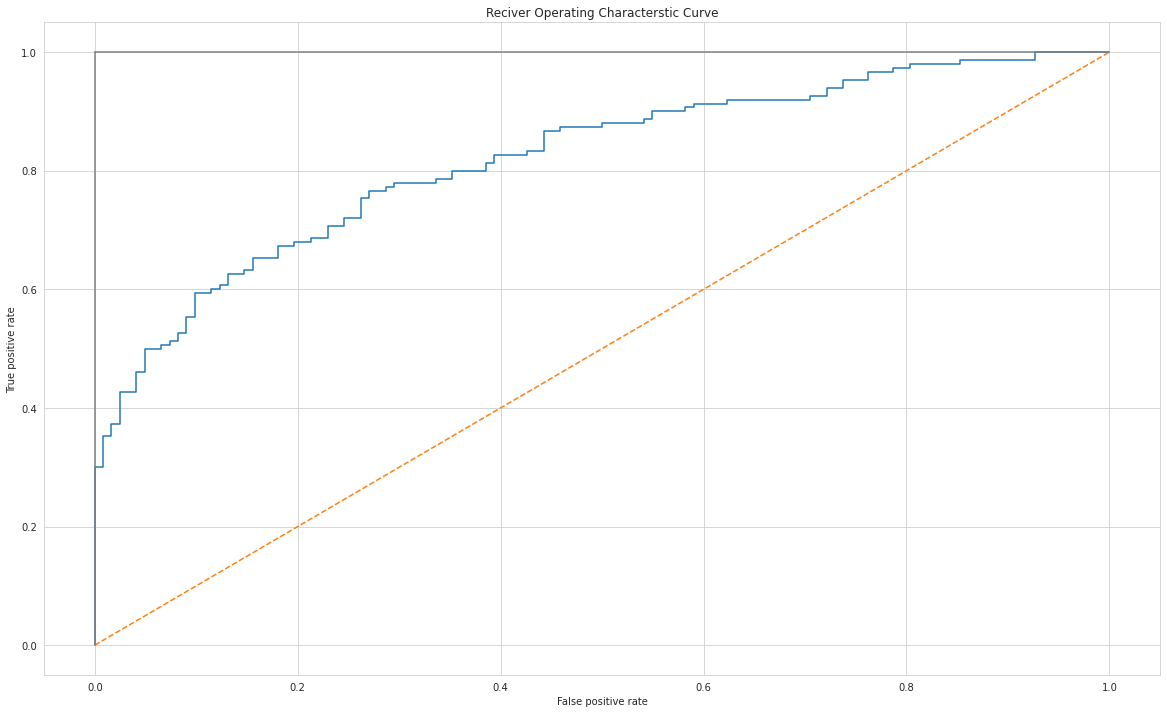

In [ ]:
target_probailities_xgbc = xgbc.predict_proba(X_test)[:,1]
log_false_positive_rate,log_true_positive_rate,log_threshold = roc_curve(y_test,target_probailities_xgbc)
sns.set_style('whitegrid')
plt.figure(figsize=(20,12))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(log_false_positive_rate,log_true_positive_rate)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()

In [ ]:
XGBCRoc=roc_auc_score(y_test,target_probailities_xgbc)
XGBCRoc

0.8203278688524591

# LightGBM Classification

In [ ]:
lgbc = lgb.LGBMClassifier()
lgbc.fit(X_train, y_train)

LGBMClassifier()

In [ ]:
param_grid = {"n_estimators":[10,100],'boosting_type': ['dart','gbdt'],'learning_rate': [0.05,0.1],
              'min_split_gain': [0.1,0.5],  'min_child_weight': [0.001,0.003],
              'num_leaves': [10,20],"min_child_samples": [10,20,50] }

In [ ]:
gridlgbc=GridSearchCV(lgbc,param_grid=param_grid,scoring='accuracy',cv=2,verbose=3,refit=True)
gridlgbc.fit(X_train, y_train)

Fitting 2 folds for each of 192 candidates, totalling 384 fits
[CV 1/2] END boosting_type=dart, learning_rate=0.05, min_child_samples=10, min_child_weight=0.001, min_split_gain=0.1, n_estimators=10, num_leaves=10;, score=0.673 total time=   0.0s
[CV 2/2] END boosting_type=dart, learning_rate=0.05, min_child_samples=10, min_child_weight=0.001, min_split_gain=0.1, n_estimators=10, num_leaves=10;, score=0.683 total time=   0.0s
[CV 1/2] END boosting_type=dart, learning_rate=0.05, min_child_samples=10, min_child_weight=0.001, min_split_gain=0.1, n_estimators=10, num_leaves=20;, score=0.678 total time=   0.0s
[CV 2/2] END boosting_type=dart, learning_rate=0.05, min_child_samples=10, min_child_weight=0.001, min_split_gain=0.1, n_estimators=10, num_leaves=20;, score=0.705 total time=   0.0s
[CV 1/2] END boosting_type=dart, learning_rate=0.05, min_child_samples=10, min_child_weight=0.001, min_split_gain=0.1, n_estimators=100, num_leaves=10;, score=0.732 total time=   0.1s
[CV 2/2] END boosting

GridSearchCV(cv=2, estimator=LGBMClassifier(),
             param_grid={'boosting_type': ['dart', 'gbdt'],
                         'learning_rate': [0.05, 0.1],
                         'min_child_samples': [10, 20, 50],
                         'min_child_weight': [0.001, 0.003],
                         'min_split_gain': [0.1, 0.5],
                         'n_estimators': [10, 100], 'num_leaves': [10, 20]},
             scoring='accuracy', verbose=3)

In [ ]:
gridlgbc.best_params_

{'boosting_type': 'gbdt',
 'learning_rate': 0.1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.1,
 'n_estimators': 100,
 'num_leaves': 10}

In [ ]:
lgbc = lgb.LGBMClassifier(**gridlgbc.best_params_)
lgbc.fit(X_train, y_train)

LGBMClassifier(min_split_gain=0.1, num_leaves=10)

In [ ]:
y_pred = lgbc.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.72      0.72       122
           1       0.77      0.76      0.77       150

    accuracy                           0.74       272
   macro avg       0.74      0.74      0.74       272
weighted avg       0.74      0.74      0.74       272



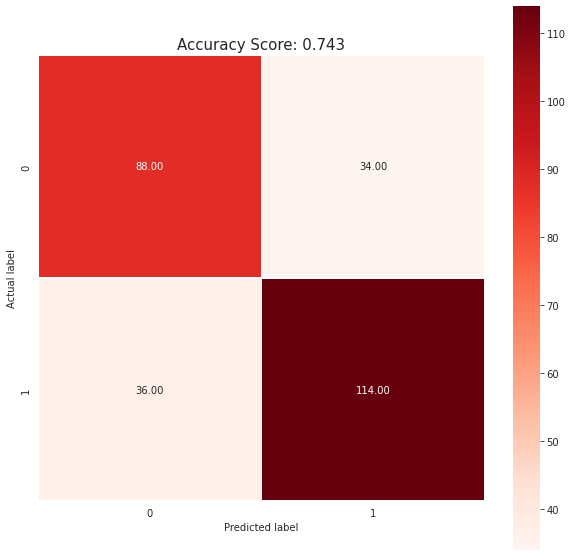

In [ ]:
predictionslgbc = lgbc.predict(X_test)
lgbcscore = lgbc.score(X_test, y_test)
cm = metrics.confusion_matrix(y_test, predictionslgbc)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt=".2f", linewidths=.5, square = True, cmap = 'Reds');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0:.3f}'.format(lgbcscore)
plt.title(all_sample_title, size = 15);

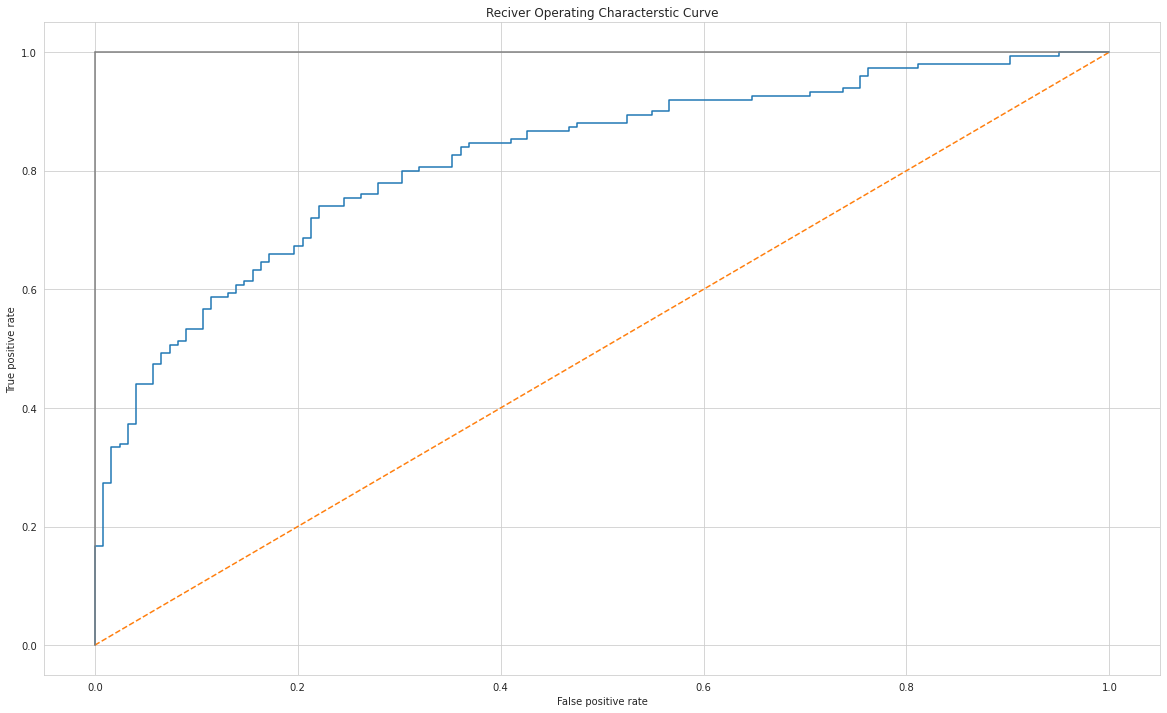

In [ ]:
target_probailities_lgbc = lgbc.predict_proba(X_test)[:,1]
log_false_positive_rate,log_true_positive_rate,log_threshold = roc_curve(y_test,target_probailities_lgbc)
sns.set_style('whitegrid')
plt.figure(figsize=(20,12))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(log_false_positive_rate,log_true_positive_rate)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()

In [ ]:
LGBCRoc=roc_auc_score(y_test,target_probailities_lgbc)
LGBCRoc

0.8208196721311475

# Conclusion for Regression

In [ ]:
print("Accuracy of Logistic Regression: {:.3f}".format(logisticregscore))
print("Accuracy of KNN: {:.3f}".format(knnclassscore))
print("Accuracy of Decision Tree : {:.3f}".format(dct_classscore))
print("Accuracy of Random Forrest : {:.3f}".format(rfcscore))
print("Accuracy of SVC : {:.3f}".format(svcscore))
print("Accuracy of XGBoost: {:.3f}".format(xgbcscore))
print("Accuracy of Light GBM: {:.3f}".format(lgbcscore))

Accuracy of Logistic Regression: 0.754
Accuracy of KNN: 0.640
Accuracy of Decision Tree : 0.713
Accuracy of Random Forrest : 0.746
Accuracy of SVC : 0.739
Accuracy of XGBoost: 0.746
Accuracy of Light GBM: 0.743


In [ ]:
classmethods = ["Logistic Regression","KNN"," Decision Tree" ," Random Forrest ","SVC","XGBoost", "Light GBM"]

accuracyvalues = [logisticregscore,knnclassscore,dct_classscore,rfcscore,svcscore,xgbcscore,lgbcscore]

fig = px.bar(x=classmethods, y=accuracyvalues, color=classmethods,text=accuracyvalues,
             title="Accuracy Values of The Classification Methods")

fig.show()

In [ ]:
print("AUC of Logistic Regression: {:.3f}".format(LOGRoc))
print("AUC of KNN: {:.3f}".format(KNNRoc))
print("AUC of Decision Tree : {:.3f}".format(DCTRoc))
print("AUC of Random Forrest : {:.3f}".format(RFCRoc))
print("AUC of SVC : {:.3f}".format(SVCRoc))
print("AUC of XGBoost: {:.3f}".format(XGBCRoc))
print("AUC of Light GBM: {:.3f}".format(LGBCRoc))

AUC of Logistic Regression: 0.838
AUC of KNN: 0.703
AUC of Decision Tree : 0.756
AUC of Random Forrest : 0.822
AUC of SVC : 0.836
AUC of XGBoost: 0.820
AUC of Light GBM: 0.821


In [ ]:
classmethods = ["Logistic Regression","KNN"," Decision Tree" ," Random Forrest ","SVC ","XGBoost", "Light GBM"]

rogvalues = [LOGRoc,KNNRoc,DCTRoc,RFCRoc,SVCRoc,XGBCRoc,LGBCRoc]

fig = px.bar(x=classmethods, y=rogvalues, color=classmethods,text=rogvalues,
             title="AUC Values of The Classification Methods")

fig.show()

In [ ]:
#We can use Logistic Regression,Random Forest, SVC, XGBoost or Light GBM for the classification.

# **CLUSTERING**

In [ ]:
#I know that clustering before classification could be more meaningful since our number of cluster could be changeable.
#But I just want to show the basics and logic behind clustering.
#Generally we should try K-Means first, then DBSCAN, then Hierarchical Clustering and lastly GMM. But I didn't apply GMM since it is a little uncommon method.
#Also It could be better if we use the original version of the dataset without the winsorized and dropped columns.

In [ ]:
winedf

citric acid    pH  ...  winsorized sulphates  Quality
0            0.00  3.51  ...                  0.56        0
1            0.00  3.20  ...                  0.68        0
2            0.04  3.26  ...                  0.65        0
3            0.56  3.16  ...                  0.58        1
5            0.00  3.51  ...                  0.56        0
...           ...   ...  ...                   ...      ...
1593         0.08  3.42  ...                  0.82        1
1594         0.08  3.45  ...                  0.58        0
1595         0.10  3.52  ...                  0.76        1
1597         0.12  3.57  ...                  0.71        0
1598         0.47  3.39  ...                  0.66        1

[1359 rows x 9 columns]

# K-Means Clustering

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
y = winedf.iloc[:,-1]
X = winedf.iloc[:,:-1]

In [ ]:
scaler = StandardScaler()
X_std  = scaler.fit_transform(X)

In [ ]:
kmeans_cluster = KMeans(n_clusters=2, random_state=145)

In [ ]:
kmeans_cluster.fit(X_std)
kmpred = kmeans_cluster.predict(X_std)

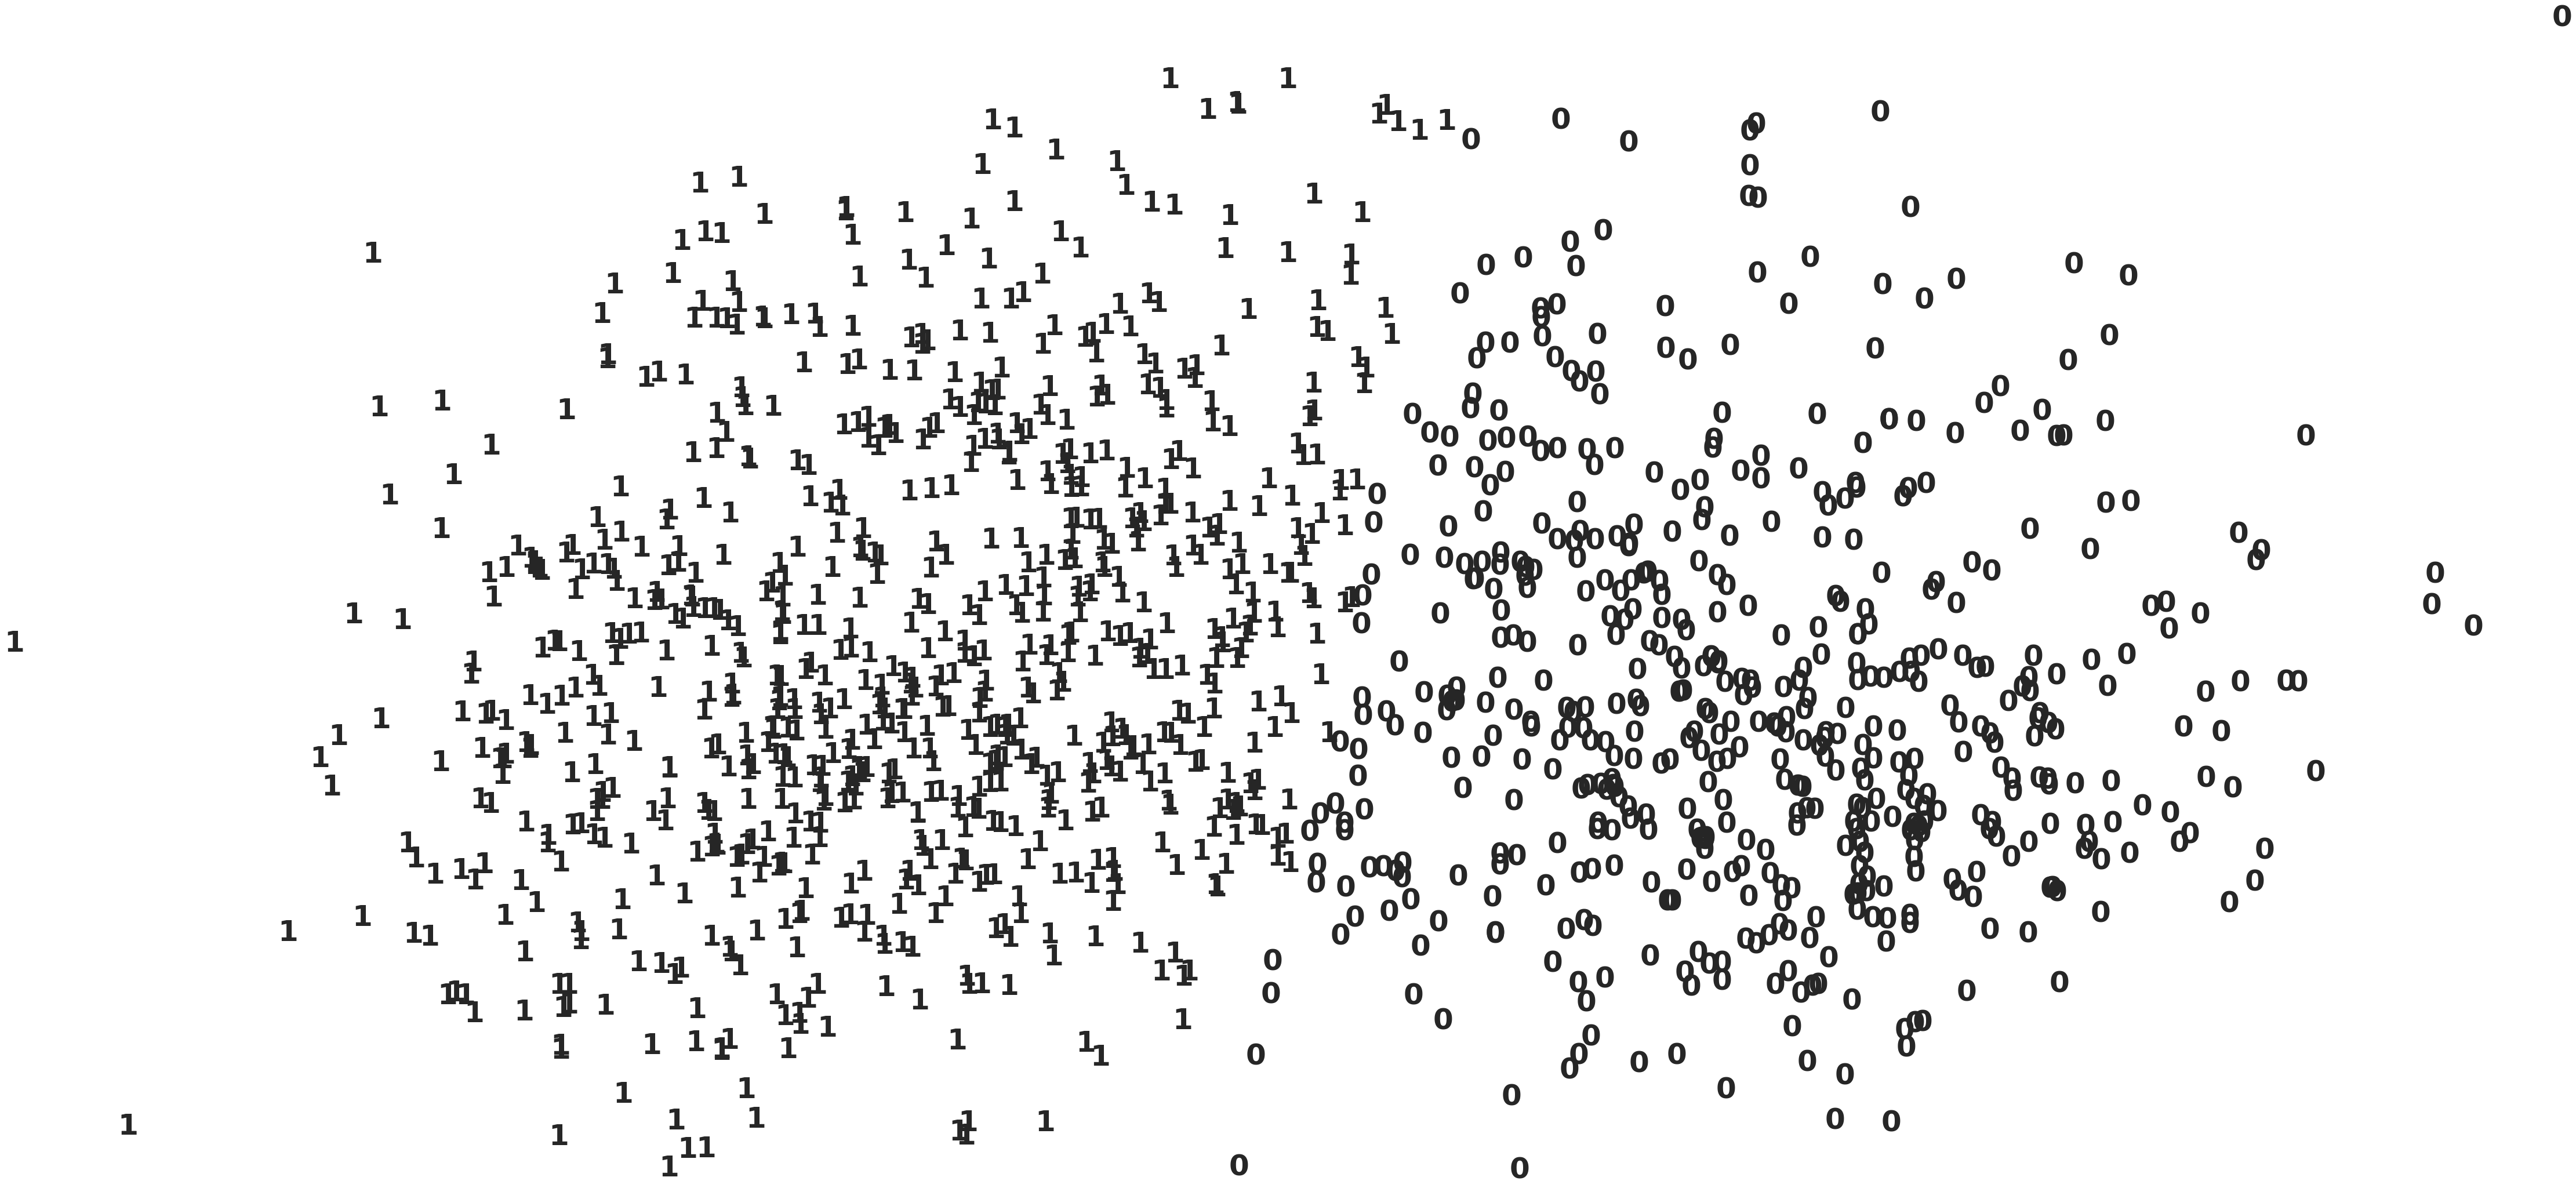

In [ ]:
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(kmpred[i]),fontdict={'weight': 'bold', 'size': 50})

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [ ]:
kmari = metrics.adjusted_rand_score(y, kmpred)
print("ARI of K-Means: {:.3f}".format(kmari))
kmsil = metrics.silhouette_score(X_std, kmpred, metric='euclidean')
print("Silhouette Score of K-Means: {:.3f}".format(kmsil))


ARI of K-Means: 0.087
Silhouette Score of K-Means: 0.207


# Hierarchical Clustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
agg_hc = AgglomerativeClustering(linkage='complete', affinity='cosine',n_clusters=2)

In [ ]:
hcpred = agg_hc.fit_predict(X_std)

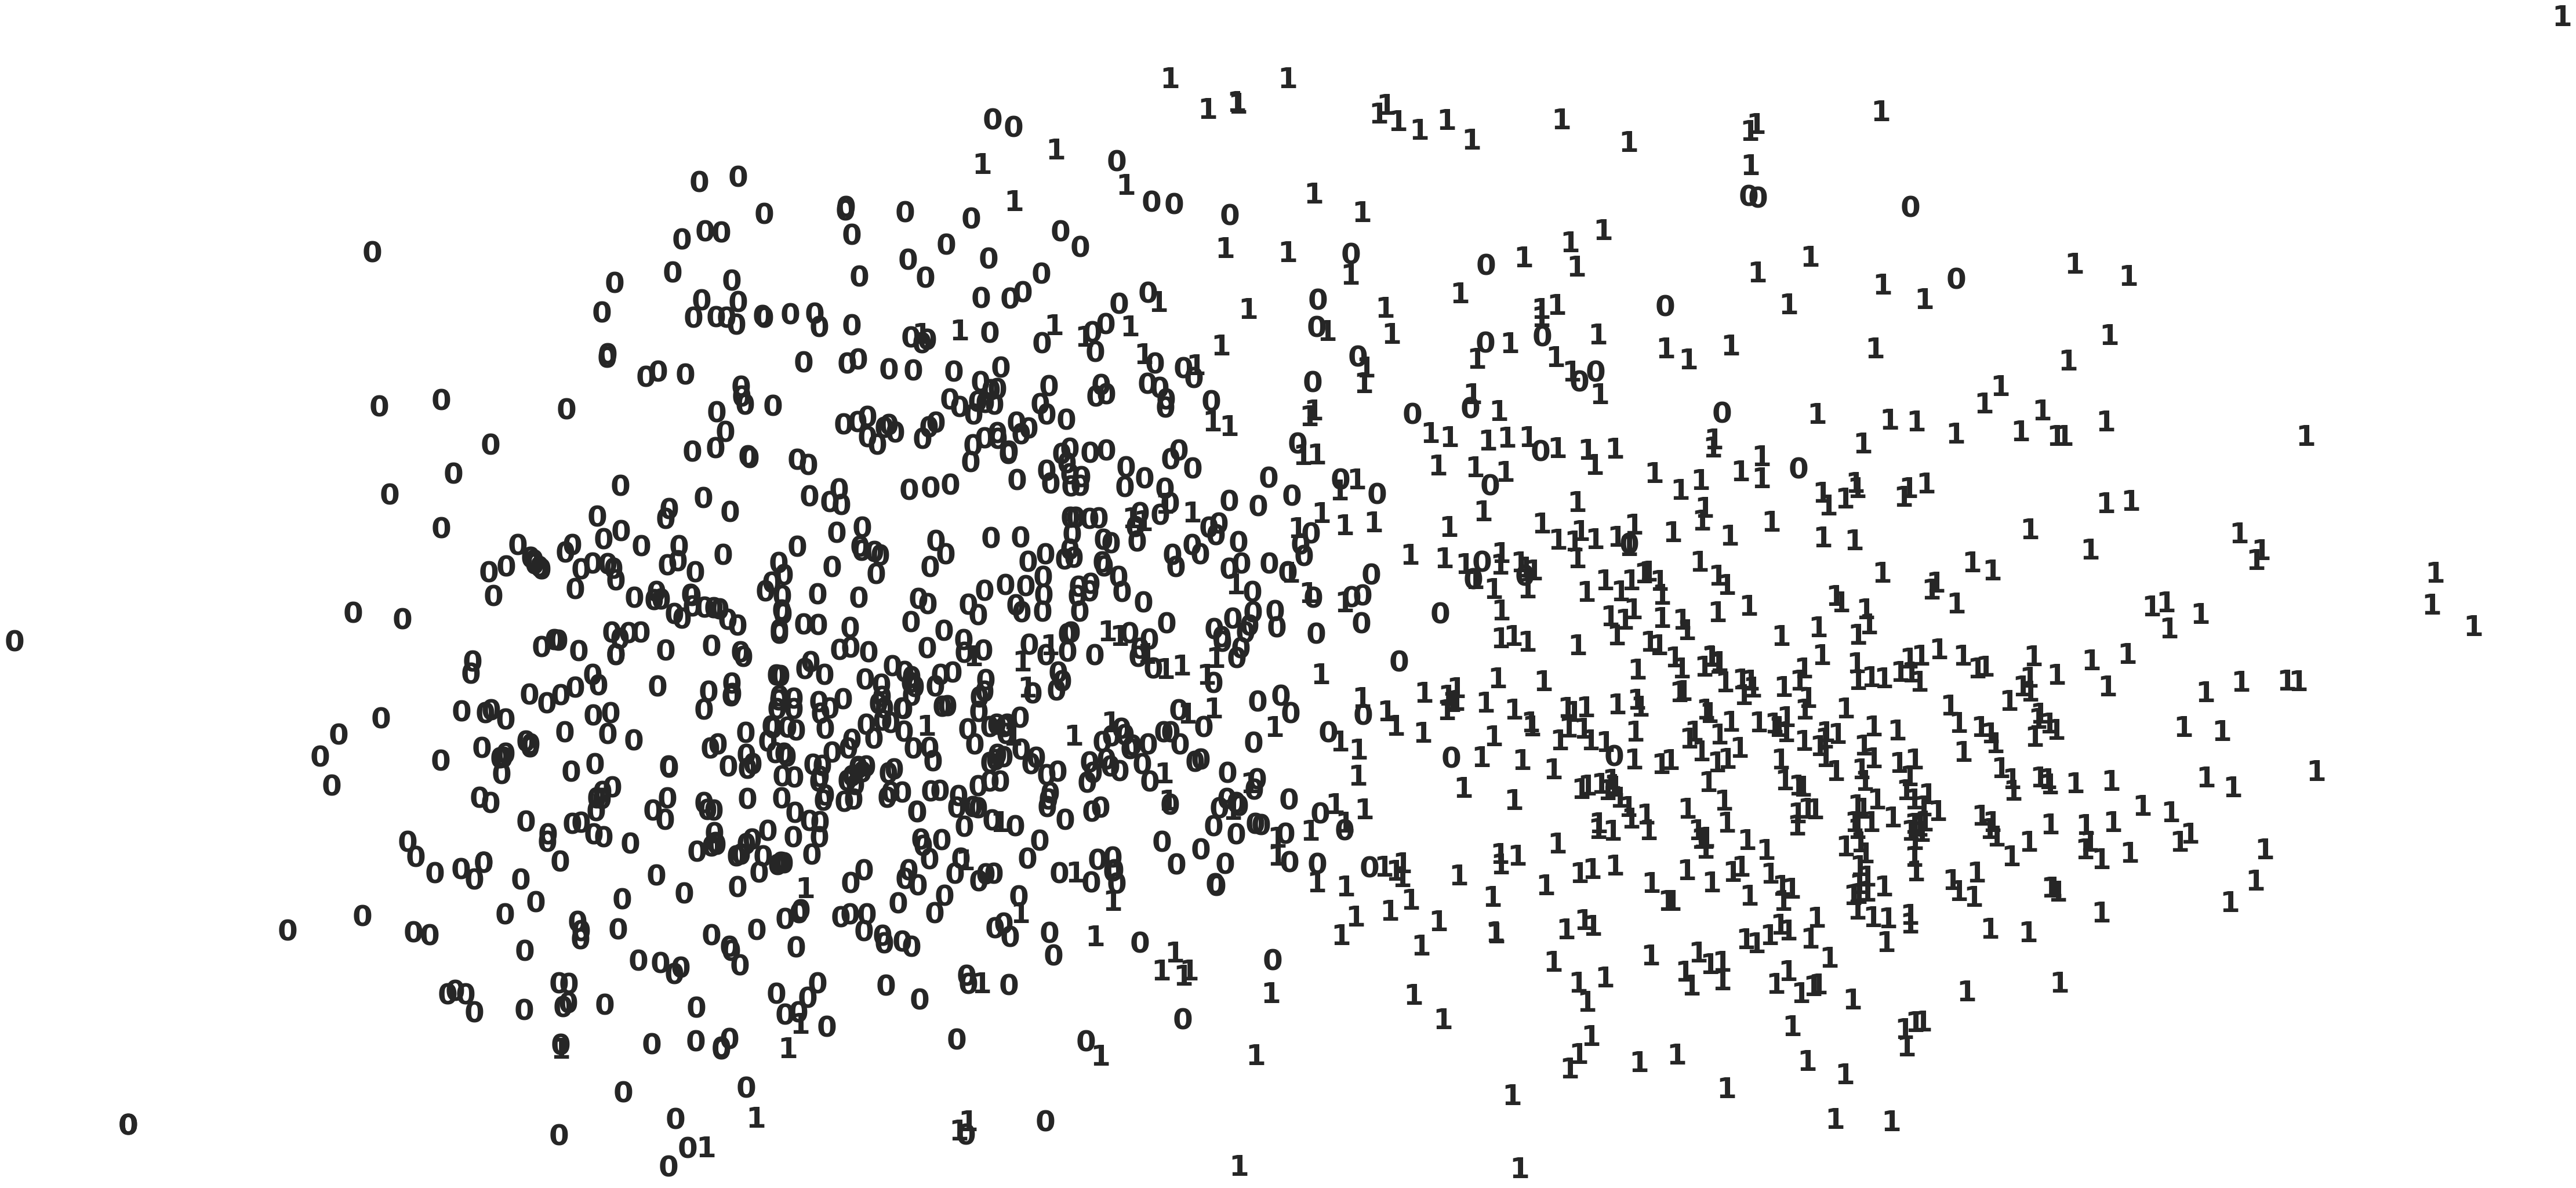

In [ ]:
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(hcpred[i]),
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [ ]:
hcari = metrics.adjusted_rand_score(y, hcpred)
print("ARI of Hierarchical Clustering: {:.3f}".format(hcari))
hcsil = metrics.silhouette_score(X_std, hcpred, metric='euclidean')
print("Silhouette Score of Hierarchical Clustering: {:.3f}".format(hcsil))

ARI of Hierarchical Clustering: 0.074
Silhouette Score of Hierarchical Clustering: 0.176


# DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
dbscan_cluster = DBSCAN(eps=2.5, min_samples=5)

dbscluster = dbscan_cluster.fit_predict(X_std)

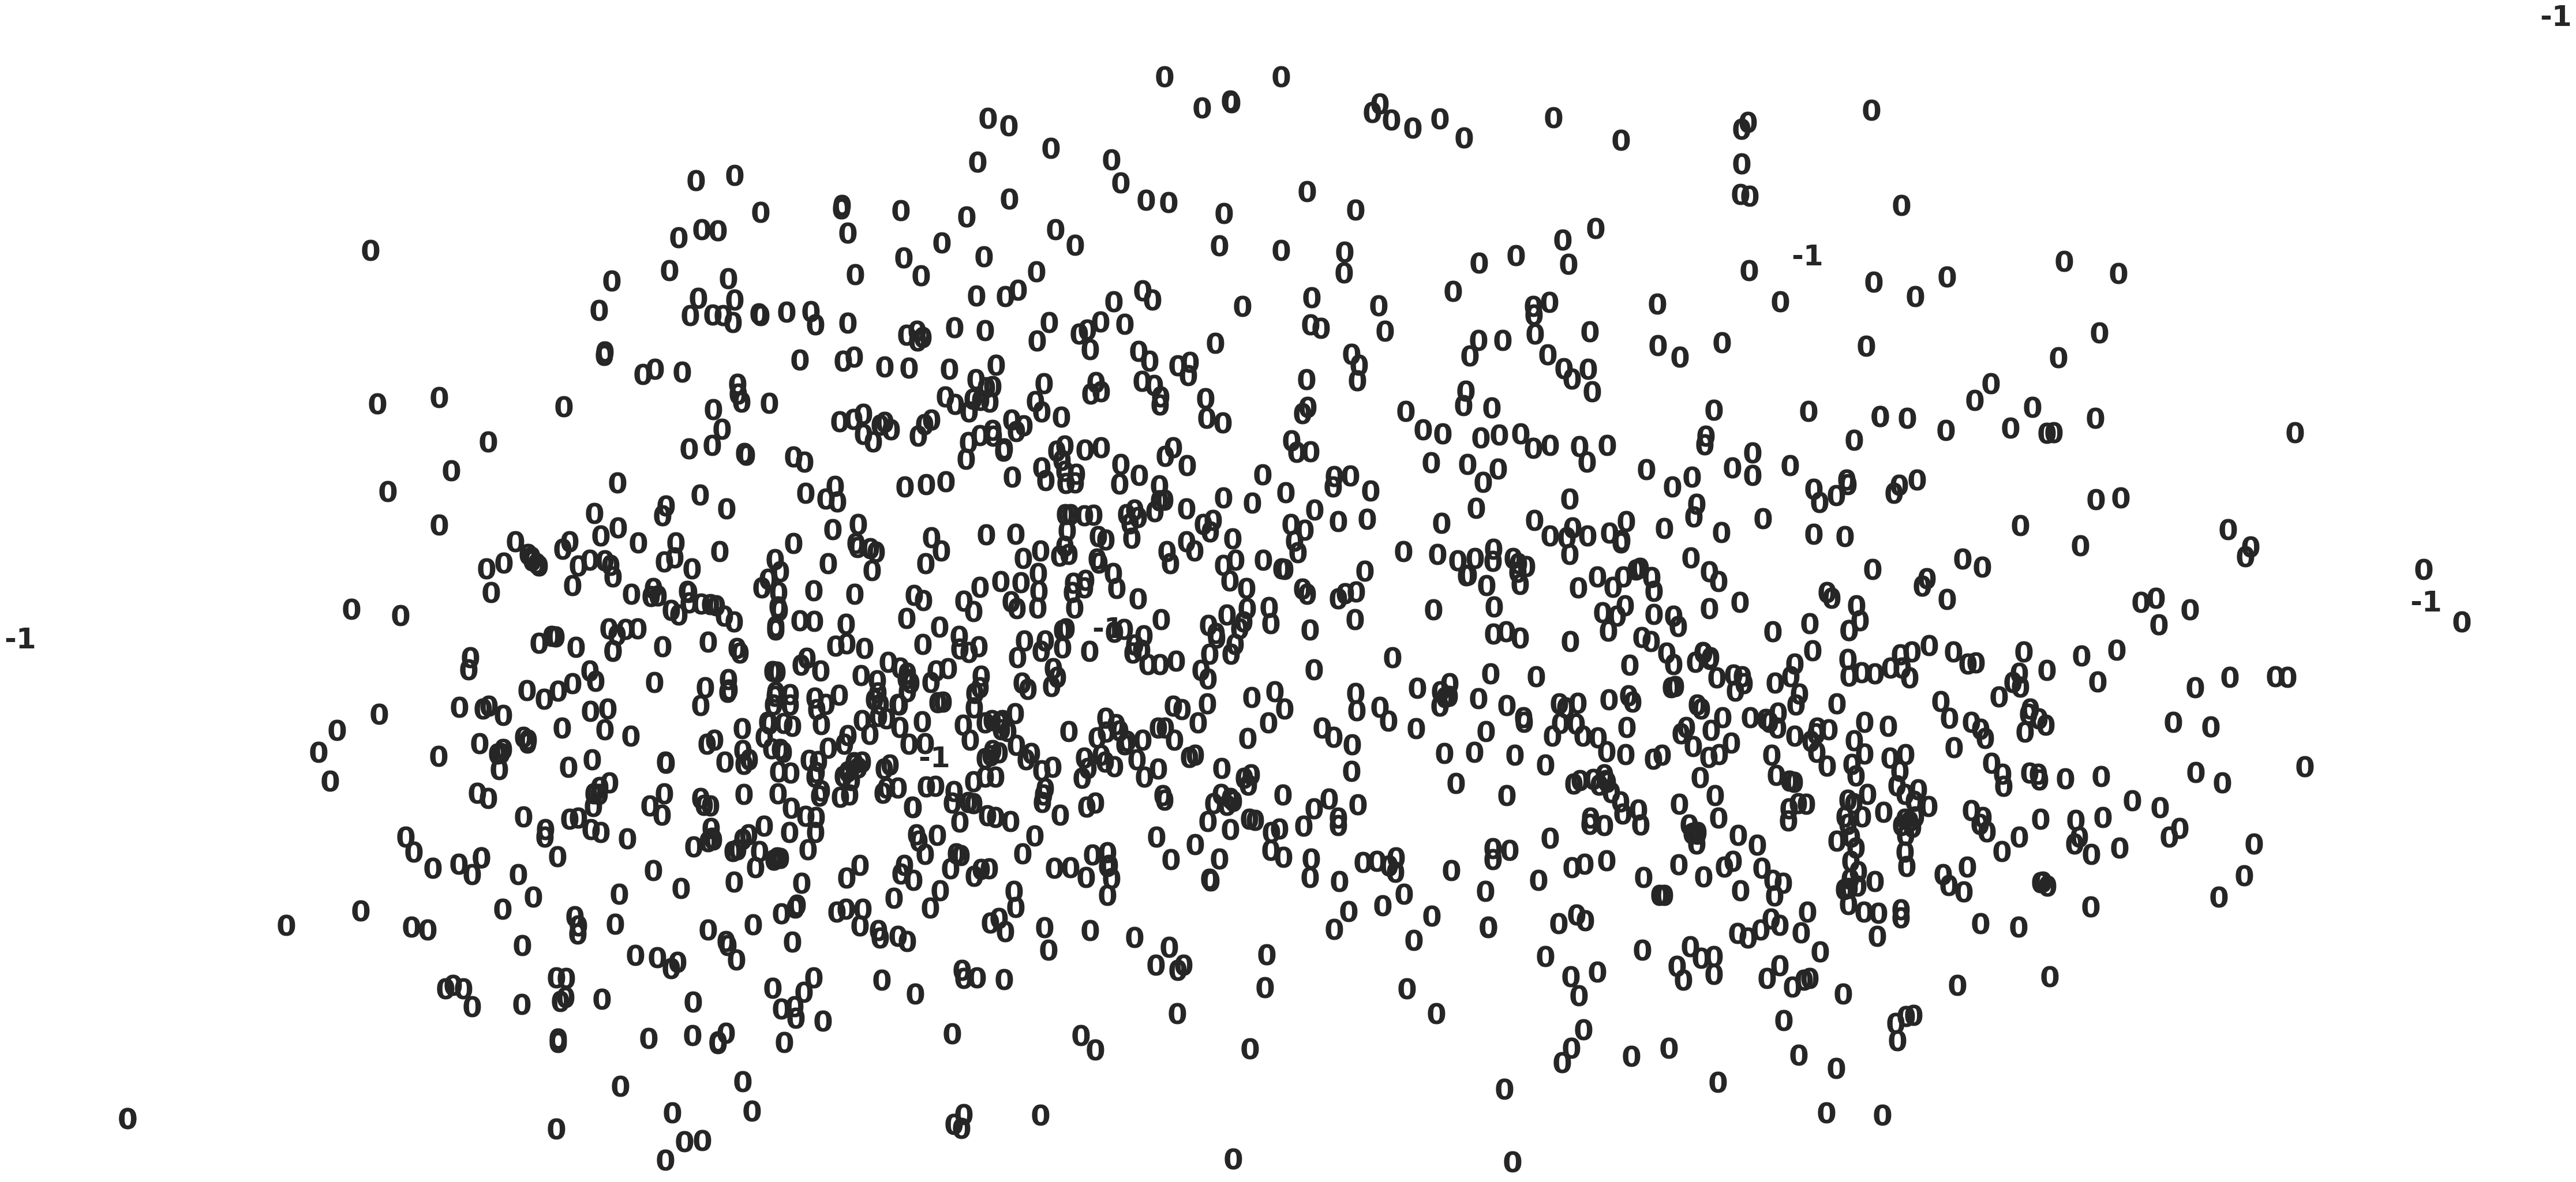

In [ ]:
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(dbscluster[i]),
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()


In [ ]:
dbsari = metrics.adjusted_rand_score(y, dbscluster)
print("ARI of DBSCAN: {:.3f}".format(dbsari))
dbssil = metrics.silhouette_score(X_std, dbscluster, metric='euclidean')
print("Silhouette Score of DBSCAN: {:.3f}".format(dbssil))

ARI of DBSCAN: 0.000
Silhouette Score of DBSCAN: 0.348


# Conclusion for Clustering

In [ ]:
clustermethods = ["K-Means"," Hierarchical Clustering" ,"DBSCAN"]

ARIValues = [kmari,hcari,dbsari]

fig = px.bar(x=clustermethods, y=ARIValues, color=clustermethods,text=ARIValues,
             title="Adjusted Rand Index of The Clustering Methods")

fig.show()

In [ ]:
clustermethods = ["K-Means"," Hierarchical Clustering" ,"DBSCAN"]

SILValues = [kmsil,hcsil,dbssil]

fig = px.bar(x=clustermethods, y=SILValues, color=clustermethods,text=SILValues,
             title="Silhouette Coefficient of The Clustering Methods")

fig.show()

In [ ]:
#K-Means is the best way to apply clustering.